In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
# import requests
# import urllib.request
from matplotlib import rc
import seaborn as sns

%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)
# %matplotlib qt

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]



from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [2]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [3]:
tripadv.loc[tripadv.Posted=='8-Jul', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
13716,Petersen Automotive Museum,Los Angeles,8-Jul,0,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,"Clifton, Virginia"
13723,Petersen Automotive Museum,Los Angeles,8-Jul,0,698,101,1,5,"I am NOT AT ALL interested in cars, but I thou...",MUCH better than expected,JdeP,London


In [4]:
tripadv['Posted'] = tripadv['Posted'].apply(lambda x: x.zfill(6))

In [5]:
tripadv['Visited'] = tripadv['Visited'].apply(lambda x: x.zfill(6) if x != '' else None)

In [6]:
tripadv['Posted'] = pd.to_datetime(tripadv['Posted'].astype(str), format='%y-%b')

In [7]:
tripadv.loc[tripadv.Visited=='000000', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
2023,The Art Institute of Chicago,Chicago,2019-05-01,000000,125,42,0,5,A day is not enough for the beautiful artifact...,A day is not enough...,CyprusEffie,"Larnaca, Cyprus"
2203,The Art Institute of Chicago,Chicago,2018-09-01,000000,98,26,0,5,I spent several hours here and still didn’t se...,Amazing,eightohtwo,"Burlington, Vermont"
2535,The Art Institute of Chicago,Chicago,2019-07-01,000000,46,33,1,5,Superb quality and impossible to take all of i...,Could return many times to this museum,JS19772017,"Kansas City, Kansas"
2695,The Art Institute of Chicago,Chicago,2020-01-01,000000,5,0,0,5,You must visit this Chicago staple. They have ...,Fantastic.,jules,"Chicago, Illinois"
2797,The Art Institute of Chicago,Chicago,2019-09-01,000000,43,9,0,5,This museum has a great collection of art from...,Great Art Museum,AdamB16,"Iowa City, Iowa"
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,2,0,0,5,My party of six included my aging parents. Guy...,"""The Guy""",Jeff Cole,"Indianapolis, Indiana"
36470,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,159,54,1,5,The memorial is so moving and beautiful So hea...,A moving must see!,jadehardman1983,"Swinton, United Kingdom"
36621,The National 9/11 Memorial & Museum,New York City,2020-03-01,000000,432,1,3,4,The 9/11 Memorial Museum tour helps give peopl...,The Ideal Learning Experience for Out-of-Towners,Richard L. Entrup,"New York City, New York"
36682,The National 9/11 Memorial & Museum,New York City,2020-06-01,000000,35,73,3,5,This was so beautifully done. From outside at ...,Wow,Jana T,NaN


In [8]:
tripadv['Visited'] = pd.to_datetime(tripadv['Visited'].astype(str), format='%y-%b', errors='coerce')

In [9]:
tripadv.loc[2023,]

Attraction                             The Art Institute of Chicago
City                                                        Chicago
Posted                                          2019-05-01 00:00:00
Visited                                                         NaT
User_Reviews                                                    125
User_Helpful                                                     42
Review_Helpful                                                    0
Rating                                                            5
Text              A day is not enough for the beautiful artifact...
Title                                        A day is not enough...
Username                                                CyprusEffie
User_Location                                       Larnaca, Cyprus
Name: 2023, dtype: object

In [10]:
tripadv.shape

(38294, 12)

In [11]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
14122,Petersen Automotive Museum,Los Angeles,2015-01-01,2014-11-01,239,93,0,5,The Peterson goes beyond just having a collect...,"One of, if not, The Best Auto Museums",Hal R,"Los Angeles, California"
27998,Fenway Park,Boston,2019-09-01,2019-09-01,93,80,0,5,Very interesting and informative. Even if base...,Piece of history,jont33,"Dartford, United Kingdom"
29041,360 Chicago Observation Deck,Chicago,2019-10-01,2019-10-01,138,39,0,3,$22 is a pricey just to go up the 94th floor a...,Expensive adission.,Bluette B,"Luzon, Philippines"
17701,The Getty Center,Los Angeles,2018-12-01,2018-08-01,7,0,0,5,Our family loves going to the Getty center! It...,Amazing experience!,Larisa B,"Los Angeles, California"
2368,The Art Institute of Chicago,Chicago,2018-10-01,2018-10-01,5,0,0,5,"Easy, informative, and enjoyable. Volunteers w...",Art visit,Brian H,"Chicago, Illinois"
13317,Universal Studios Hollywood,Los Angeles,2019-11-01,2019-11-01,223,66,3,5,We visited without kids and it was great fun. ...,Fun even for adults!,Cyngtz,"Monterrey, Mexico"
23791,Boston Tea Party Ships & Museum,Boston,2018-10-01,2018-09-01,63,16,0,4,It was a fun interesting tour...wished we coul...,Interesting,MIDWESTJF,"Decorah, Iowa"
6108,Empire State Building,New York City,2019-12-01,2019-12-01,54,17,1,5,Had reservations before as I was told the queu...,A must while in NYC,Anthony O,"Manchester, United Kingdom"
22602,Boston Tea Party Ships & Museum,Boston,2017-04-01,2017-04-01,244,57,0,5,I went here today with my daughter's 6th grade...,School field trip great choice,Carla M,"Providence, Rhode Island"
35990,The National 9/11 Memorial & Museum,New York City,2019-12-01,2019-12-01,472,162,1,4,When we showed up we visited the view pools. M...,Lines Crazy Long,T2Socks,"Key West, Florida"


In [12]:
# Split up the location column to grab all possible parts of the location

tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']

tripadv_loc = tripadv_loc.fillna(value='').apply(lambda x: x.astype(str).str.upper())

tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)

tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
26814,Fenway Park,Boston,2018-10-01,2018-08-01,396,161,0,5,"Fenway park is such an old park, but they have...",It's Fenway!,Case1096,EAST WINDSOR,NEW JERSEY,,,
5381,The Metropolitan Museum of Art,New York City,2019-08-01,2019-08-01,89,35,1,5,We went to the Met museum on a recent visit to...,Plan ahead for massive museum,BandCWells,INDIANAPOLIS,INDIANA,,,
32015,Museum of Science and Industry,Chicago,2020-08-01,2020-08-01,1,0,0,4,Amazing experience for all ages!!! Only proble...,Awesome!!,CDG,,,,,
23187,Boston Tea Party Ships & Museum,Boston,2017-10-01,2017-10-01,112,32,0,4,We were on a trip that was in part a history t...,Interesting and Informative,coachjcu,BOCA RATON,FL,,,
21333,Museum of Fine Arts,Boston,2017-09-01,2017-07-01,4,1,0,4,We didn't even feel stressed because we knew w...,Going with a member on Thursdays is the best,OphWin,BOSTON,MASSACHUSETTS,,,
15007,Petersen Automotive Museum,Los Angeles,2018-01-01,2017-12-01,203,79,0,5,"If you love cars, you have to visit one of the...",Great for car enthusiasts of all ages,Ian B,SILVER SPRING,MARYLAND,,,
1588,Millennium Park,Chicago,2019-08-01,2019-07-01,23,3,0,5,"Great photo op with sculpture, fountains and g...",Seen the bean!,NLinsider,MOUNT PEARL,CANADA,,,
16741,The Getty Center,Los Angeles,2018-02-01,2017-05-01,40,7,0,5,The Getty provides the perfect place to view t...,Nice View,David Ryu,LONDON,UNITED KINGDOM,,,
17343,The Getty Center,Los Angeles,2018-08-01,2018-06-01,2,6,1,5,Getty Center is the best! It’s free admission&...,Summer in Getty,newcouple2011,LOS ANGELES,CALIFORNIA,,,
26181,North End,Boston,2019-06-01,2019-05-01,68,30,0,5,We went here both nights we stayed in Boston! ...,A must stop!,glutengirl25,NORTH CHICAGO,ILLINOIS,,,


In [13]:
st_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

from collections import Counter

st_abbr = {k.upper(): v for k, v in st_abbr.items()}
st_abbr

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

In [14]:
tripadv['User_Loc2'] = tripadv.User_Loc2.replace(st_abbr)
tripadv

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


## Rating Stats

In [15]:
# Simple stats on whether reviews for Boston were marked helpful

tripadv[tripadv['City']=='Los Angeles'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
Attraction,,,,,
Griffith Observatory,9155,1,5,4.588972,0.727369
Petersen Automotive Museum,9152,1,5,4.598995,0.742314
The Getty Center,9478,1,5,4.794133,0.548836
The Wizarding World of Harry Potter,4977,1,5,4.612604,0.753513
Universal Studios Hollywood,8630,1,5,4.315000,1.022398


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [16]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
35949,The National 9/11 Memorial & Museum,New York City,2019-12-01,2019-12-01,1,0,0,4,Glad we took our teens. Booked ahead for 10am ...,Thoughtfully done,Ap4,,,,,
37315,Central Park,New York City,2019-11-01,2019-11-01,"9,329",2,0,5,Nearly 850 acres of wonderful park and pond- b...,Wonderful park,THE TRAVELLER,MALAGA,SPAIN,,,
26944,Fenway Park,Boston,2018-11-01,2018-10-01,334,82,0,5,Hoping to snag a few tickets to the start of t...,Walking along Yawkey Way during the World Seri...,GBaby2,PROVIDENCE,RI,,,
14627,Petersen Automotive Museum,Los Angeles,2016-12-01,2016-11-01,58,16,0,4,Went with a large family group. There are thre...,Saturday Afternoon Visit,Karen S,DENVER,,,,
32465,360 Chicago Observation Deck,Chicago,2019-03-01,2019-03-01,167,6,1,5,Thoroughly enjoyed our visit to 360 and lived ...,Way better than Willis tower,Venessa G,EUREKA SPRINGS,AR,,,
33321,Cloud Gate,Chicago,2019-03-01,2018-11-01,"3,909",236,0,4,It is definitely where everyone flocks to in M...,Shiny Happy Bean,Thedevelopingimage,VERMILION,OH,,,
20515,Freedom Trail,Boston,2019-12-01,2019-12-01,120,17,0,5,Downloaded the $5 app that provided a self-gui...,Very interesting,Steven V,ROCHESTER,MN,,,
25918,North End,Boston,2018-09-01,2018-09-01,295,105,1,5,Three freedom trail tour begins you to this ar...,Great historical value.,Chris K,WASHINGTON,,,,
35562,The National 9/11 Memorial & Museum,New York City,2019-11-01,2019-11-01,468,118,1,5,"We bought tickets online, ones that allowed en...","Thoroughly Informative, Moving and Crowded",westernfb,BALTIMORE,MD,,,
15286,Petersen Automotive Museum,Los Angeles,2018-12-01,2018-12-01,119,80,1,5,Not only classic cars but the story and scienc...,"Great cars, great museum",Armen Pandola,PARIS,FRANCE,,,


# Analyzing Los Angeles

### Analyzing by Rating (5 stars, 4 stars, Poor)

In [17]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='Los Angeles') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
13371,Universal Studios Hollywood,Los Angeles,2019-12-01,2019-12-01,161,378,13,5,We spent a sunny day with NO PEOPLE in Univers...,Thrills & Butterbeer at Universal Hollwood!,NaN,PARIS,FRANCE,,,
15952,The Wizarding World of Harry Potter,Los Angeles,2017-03-01,2017-03-01,26,9,0,Poor,The wait on a holiday weekend is not worth the...,Harry Potter,dawwggboy10,BALTIMORE,MD,,,
17699,The Getty Center,Los Angeles,2018-12-01,2018-11-01,16,19,1,5,There is so much to see at the Getty. Wear com...,Great Museum and so much more,travelbyjb,LOS ANGELES,CA,,,
9952,Griffith Observatory,Los Angeles,2018-09-01,2017-11-01,8,1,0,5,"To put it in simple terms, if you’re going to ...",A quintessential LA highlight,Jose P,,,,,
15115,Petersen Automotive Museum,Los Angeles,2018-06-01,2018-06-01,287,95,0,5,The museum is not large and has a good present...,An amazing journey into history of cars,MrVisittheworld,ABU DHABI,UNITED ARAB EMIRATES,,,
11820,Universal Studios Hollywood,Los Angeles,2019-01-01,2018-03-01,54,28,1,5,I had a great time at universal studios the li...,Univeral,thumbzee,,,,,
12781,Universal Studios Hollywood,Los Angeles,2019-08-01,2019-08-01,9,25,3,5,Wonderful full day adventure for friends and f...,Fun for all ages!,Los Angeles Sites Not to Miss,LOS ANGELES,CA,,,
12278,Universal Studios Hollywood,Los Angeles,2019-05-01,2019-05-01,149,19,0,5,I loved my visit!! It was so magical!! I loved...,Great spring vacation.,MaitreyeeMayhem,ROY,UT,,,
10316,Griffith Observatory,Los Angeles,2018-12-01,2018-12-01,6,4,0,5,Perfect place to get a glimpse of DTLA and Hol...,Amazing views,Pri rb,BOSTON,MA,,,
5970,The Wizarding World of Harry Potter,Los Angeles,2020-05-01,2020-01-01,119,16,0,5,This section of Universal Studios was the most...,"Amazing, but crowded",rmrincon,AUSTIN,TX,,,


## Using Word Lemmatizer to Analyze Text Data

### Single Word Analysis

- 5 Star Analysis

In [18]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['los angeles', '’', "n't", "'s", 'u', 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

fdist_5star = FreqDist(tokens_5star)
fdist_5star.most_common(50)

[('car', 2831),
 ('great', 2505),
 ('ride', 2482),
 ('day', 2344),
 ('time', 2340),
 ('museum', 2324),
 ('place', 2111),
 ('see', 2106),
 ('view', 2093),
 ('tour', 2064),
 ('visit', 1943),
 ('one', 1580),
 ('park', 1549),
 ('la', 1463),
 ('parking', 1414),
 ('amazing', 1414),
 ('go', 1414),
 ('well', 1352),
 ('worth', 1280),
 ('art', 1269),
 ('lot', 1162),
 ('free', 1110),
 ('getty', 1091),
 ('really', 1048),
 ('exhibit', 1035),
 ('take', 1029),
 ('observatory', 1018),
 ('show', 999),
 ('harry', 997),
 ('potter', 994),
 ('hour', 983),
 ('would', 966),
 ('experience', 961),
 ('beautiful', 949),
 ('must', 937),
 ('like', 931),
 ('studio', 905),
 ('universal', 892),
 ('collection', 885),
 ('good', 879),
 ('fun', 854),
 ('garden', 844),
 ('much', 836),
 ('many', 823),
 ('world', 796),
 ('line', 784),
 ('hollywood', 783),
 ('even', 773),
 ('best', 765),
 ('building', 739)]

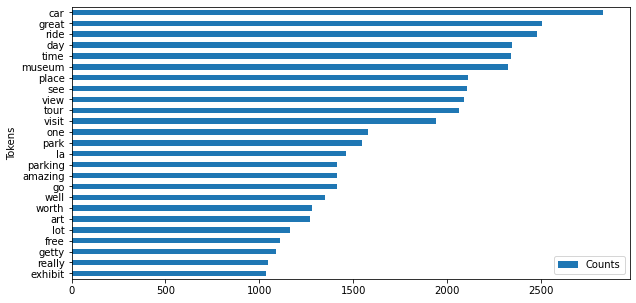

In [19]:
# Graph of Word Count

fdist_5star_graph = pd.DataFrame(fdist_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_5star_graph.invert_yaxis()

- 4 Star Analysis

In [20]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

fdist_4star = FreqDist(tokens_4star)
fdist_4star.most_common(50)

[('ride', 1082),
 ('car', 1000),
 ('great', 752),
 ('time', 727),
 ('day', 667),
 ('park', 636),
 ('tour', 635),
 ('museum', 602),
 ('see', 571),
 ('view', 533),
 ('place', 504),
 ('parking', 504),
 ('lot', 484),
 ('visit', 470),
 ('one', 450),
 ('go', 438),
 ('good', 431),
 ('would', 418),
 ('potter', 410),
 ('harry', 401),
 ('worth', 393),
 ('hour', 390),
 ('observatory', 382),
 ('really', 375),
 ('well', 374),
 ('line', 343),
 ('la', 342),
 ('show', 336),
 ('universal', 327),
 ('studio', 327),
 ('like', 319),
 ('fun', 301),
 ('take', 294),
 ('hollywood', 280),
 ('exhibit', 279),
 ('much', 278),
 ('kid', 274),
 ('went', 269),
 ('free', 262),
 ('nice', 255),
 ('walk', 253),
 ('wait', 250),
 ('interesting', 246),
 ('world', 238),
 ('experience', 237),
 ('around', 233),
 ('enjoyed', 232),
 ('many', 231),
 ('even', 230),
 ('long', 229)]

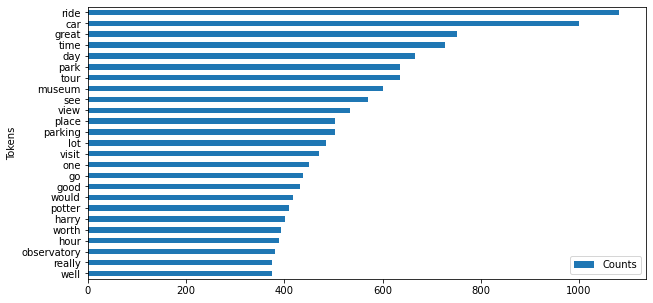

In [21]:
fdist_4star_graph = pd.DataFrame(fdist_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [22]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

fdist_poor = FreqDist(tokens_poor)
fdist_poor.most_common(50)

[('ride', 921),
 ('park', 583),
 ('car', 436),
 ('time', 365),
 ('tour', 333),
 ('go', 331),
 ('universal', 320),
 ('day', 300),
 ('one', 294),
 ('would', 290),
 ('studio', 282),
 ('line', 269),
 ('potter', 263),
 ('harry', 252),
 ('museum', 249),
 ('see', 243),
 ('hour', 233),
 ('really', 226),
 ('parking', 223),
 ('ticket', 223),
 ('like', 214),
 ('place', 211),
 ('lot', 207),
 ('good', 203),
 ('visit', 201),
 ('wait', 195),
 ('people', 192),
 ('u', 189),
 ('much', 187),
 ('great', 181),
 ('experience', 180),
 ('show', 178),
 ('minute', 169),
 ('worth', 166),
 ('went', 165),
 ('could', 155),
 ('even', 151),
 ('long', 150),
 ('food', 150),
 ('back', 149),
 ('way', 140),
 ('many', 135),
 ('nice', 133),
 ('view', 130),
 ('money', 127),
 ('thing', 126),
 ('around', 125),
 ('fun', 125),
 ('world', 124),
 ('got', 123)]

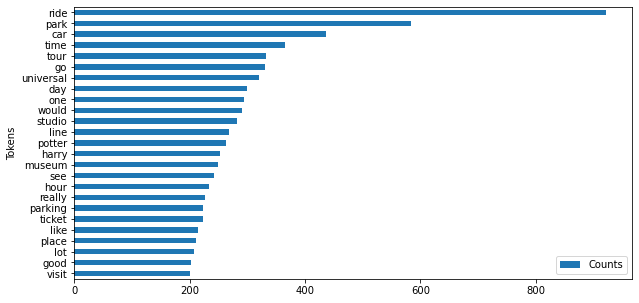

In [23]:
fdist_poor_graph = pd.DataFrame(fdist_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_poor_graph.invert_yaxis()

- We can see that most of the reviews that gave 3 or fewer stars mentioned tours the most

### Bigram Analysis

- 5 Star Analysis

In [24]:
corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('harry', 'potter'), 962),
 (('los', 'angeles'), 565),
 (('universal', 'studio'), 465),
 (('hollywood', 'sign'), 420),
 (('getty', 'center'), 396),
 (('vault', 'tour'), 381),
 (('well', 'worth'), 330),
 (('studio', 'tour'), 322),
 (('must', 'see'), 294),
 (('highly', 'recommend'), 289),
 (('great', 'place'), 280),
 (('view', 'la'), 249),
 (('place', 'visit'), 225),
 (('griffith', 'observatory'), 218),
 (('great', 'view'), 214),
 (('worth', 'visit'), 199),
 (('make', 'sure'), 191),
 (('view', 'city'), 174),
 (('potter', 'fan'), 164),
 (('butter', 'beer'), 164),
 (('tour', 'guide'), 155),
 (('wizarding', 'world'), 147),
 (('one', 'day'), 146),
 (('really', 'enjoyed'), 144),
 (('view', 'los'), 141),
 (('express', 'pas'), 141),
 (('much', 'see'), 139),
 (('must', 'visit'), 134),
 (('automotive', 'museum'), 132),
 (('great', 'time'), 131),
 (('year', 'old'), 130),
 (('theme', 'park'), 129),
 (('guided', 'tour'), 126),
 (('amazing', 'view'), 125),
 (('go', 'back'), 123),
 (('gift', 'shop')

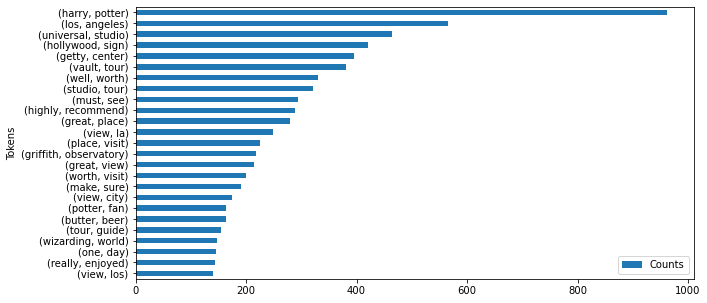

In [25]:
# Graph of 5 Star Bigram

fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

- 4 Star Analysis

In [26]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('harry', 'potter'), 390),
 (('hollywood', 'sign'), 178),
 (('studio', 'tour'), 146),
 (('universal', 'studio'), 140),
 (('vault', 'tour'), 118),
 (('los', 'angeles'), 98),
 (('view', 'la'), 80),
 (('well', 'worth'), 80),
 (('great', 'view'), 78),
 (('great', 'place'), 74),
 (('worth', 'visit'), 70),
 (('theme', 'park'), 64),
 (('wait', 'time'), 59),
 (('express', 'pas'), 56),
 (('griffith', 'observatory'), 55),
 (('roller', 'coaster'), 55),
 (('potter', 'ride'), 53),
 (('great', 'time'), 52),
 (('wizarding', 'world'), 52),
 (('forbidden', 'journey'), 52),
 (('gift', 'shop'), 51),
 (('potter', 'fan'), 50),
 (('jurassic', 'park'), 49),
 (('potter', 'world'), 49),
 (('parking', 'lot'), 47),
 (('butter', 'beer'), 47),
 (('would', 'recommend'), 46),
 (('place', 'visit'), 46),
 (('one', 'day'), 46),
 (('2', 'hour'), 44),
 (('getty', 'center'), 44),
 (('make', 'sure'), 42),
 (('view', 'city'), 41),
 (('year', 'old'), 40),
 (('view', 'hollywood'), 40),
 (('really', 'enjoyed'), 40),
 (('tour

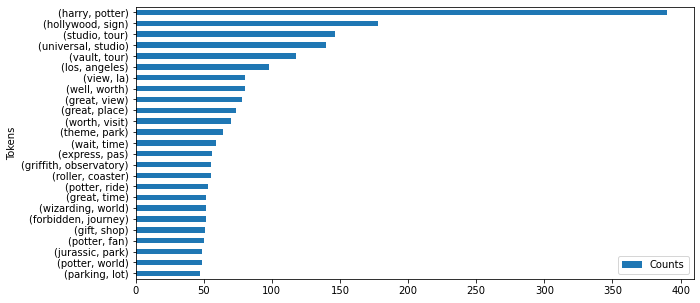

In [27]:
# Graph of 4 Star Bigram

fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [28]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('harry', 'potter'), 250),
 (('universal', 'studio'), 130),
 (('studio', 'tour'), 117),
 (('potter', 'ride'), 53),
 (('theme', 'park'), 50),
 (('hollywood', 'sign'), 41),
 (('wait', 'time'), 41),
 (('express', 'pas'), 39),
 (('roller', 'coaster'), 36),
 (('jurassic', 'park'), 35),
 (('vault', 'tour'), 31),
 (('potter', 'world'), 29),
 (('year', 'ago'), 28),
 (('mummy', 'ride'), 28),
 (('go', 'back'), 26),
 (('much', 'better'), 26),
 (('year', 'old'), 26),
 (('wizarding', 'world'), 26),
 (('fast', 'pas'), 26),
 (('2', 'hour'), 25),
 (('forbidden', 'journey'), 23),
 (('park', 'ride'), 22),
 (('ride', 'fun'), 22),
 (('express', 'ticket'), 22),
 (('tour', 'guide'), 21),
 (('potter', 'fan'), 21),
 (('universal', 'orlando'), 21),
 (('car', 'museum'), 20),
 (('many', 'ride'), 20),
 (('studio', 'hollywood'), 20),
 (('los', 'angeles'), 19),
 (('many', 'people'), 19),
 (('universal', 'hollywood'), 19),
 (('jurassic', 'world'), 19),
 (('long', 'line'), 18),
 (('feel', 'like'), 18),
 (('long', '

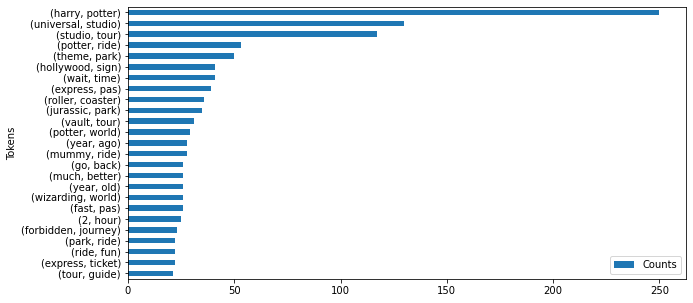

In [29]:
# Graph of Poor Bigram

fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

In [30]:
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('harry', 'potter'),
 ('los', 'angeles'),
 ('universal', 'studio'),
 ('hollywood', 'sign'),
 ('getty', 'center'),
 ('vault', 'tour'),
 ('well', 'worth'),
 ('studio', 'tour'),
 ('must', 'see'),
 ('highly', 'recommend'),
 ('great', 'place'),
 ('view', 'la'),
 ('place', 'visit'),
 ('griffith', 'observatory'),
 ('great', 'view'),
 ('worth', 'visit'),
 ('make', 'sure'),
 ('view', 'city'),
 ('potter', 'fan'),
 ('butter', 'beer'),
 ('tour', 'guide'),
 ('wizarding', 'world'),
 ('one', 'day'),
 ('really', 'enjoyed'),
 ('view', 'los'),
 ('express', 'pas'),
 ('much', 'see'),
 ('must', 'visit'),
 ('automotive', 'museum'),
 ('great', 'time'),
 ('year', 'old'),
 ('theme', 'park'),
 ('guided', 'tour'),
 ('amazing', 'view'),
 ('go', 'back'),
 ('gift', 'shop'),
 ('would', 'recommend'),
 ('one', 'best'),
 ('parking', 'lot'),
 ('definitely', 'worth'),
 ('art', 'collection'),
 ('forbidden', 'journey'),
 ('world', 'harry'),
 ('well', 'done'),
 ('car', 'museum'),
 ('spend', 'day'),
 ('great', 'day'),
 ('po

In [31]:
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('harry', 'potter'),
 ('hollywood', 'sign'),
 ('studio', 'tour'),
 ('universal', 'studio'),
 ('vault', 'tour'),
 ('los', 'angeles'),
 ('view', 'la'),
 ('well', 'worth'),
 ('great', 'view'),
 ('great', 'place'),
 ('worth', 'visit'),
 ('theme', 'park'),
 ('wait', 'time'),
 ('express', 'pas'),
 ('griffith', 'observatory'),
 ('roller', 'coaster'),
 ('potter', 'ride'),
 ('great', 'time'),
 ('wizarding', 'world'),
 ('forbidden', 'journey'),
 ('gift', 'shop'),
 ('potter', 'fan'),
 ('jurassic', 'park'),
 ('potter', 'world'),
 ('parking', 'lot'),
 ('butter', 'beer'),
 ('would', 'recommend'),
 ('place', 'visit'),
 ('one', 'day'),
 ('2', 'hour'),
 ('getty', 'center'),
 ('make', 'sure'),
 ('view', 'city'),
 ('year', 'old'),
 ('view', 'hollywood'),
 ('really', 'enjoyed'),
 ('tour', 'guide'),
 ('highly', 'recommend'),
 ('long', 'line'),
 ('go', 'back'),
 ('park', 'ride'),
 ('car', 'display'),
 ('car', 'enthusiast'),
 ('three', 'broomstick'),
 ('jurassic', 'world'),
 ('see', 'hollywood'),
 ('walk', 

In [32]:
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('harry', 'potter'),
 ('universal', 'studio'),
 ('studio', 'tour'),
 ('potter', 'ride'),
 ('theme', 'park'),
 ('hollywood', 'sign'),
 ('wait', 'time'),
 ('express', 'pas'),
 ('roller', 'coaster'),
 ('jurassic', 'park'),
 ('vault', 'tour'),
 ('potter', 'world'),
 ('year', 'ago'),
 ('mummy', 'ride'),
 ('go', 'back'),
 ('much', 'better'),
 ('year', 'old'),
 ('wizarding', 'world'),
 ('fast', 'pas'),
 ('2', 'hour'),
 ('forbidden', 'journey'),
 ('park', 'ride'),
 ('ride', 'fun'),
 ('express', 'ticket'),
 ('tour', 'guide'),
 ('potter', 'fan'),
 ('universal', 'orlando'),
 ('car', 'museum'),
 ('many', 'ride'),
 ('studio', 'hollywood'),
 ('los', 'angeles'),
 ('many', 'people'),
 ('universal', 'hollywood'),
 ('jurassic', 'world'),
 ('long', 'line'),
 ('feel', 'like'),
 ('long', 'wait'),
 ('special', 'effect'),
 ('vip', 'experience'),
 ('ride', 'show'),
 ('worth', 'visit'),
 ('gift', 'shop'),
 ('getty', 'center'),
 ('per', 'person'),
 ('general', 'admission'),
 ('motion', 'sickness'),
 ('transfor

In [33]:
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('harry', 'potter'),
 ('potter', 'fan'),
 ('studio', 'tour'),
 ('express', 'pas'),
 ('griffith', 'observatory'),
 ('los', 'angeles'),
 ('universal', 'studio'),
 ('vault', 'tour'),
 ('wizarding', 'world'),
 ('go', 'back'),
 ('potter', 'ride'),
 ('forbidden', 'journey'),
 ('year', 'old'),
 ('getty', 'center'),
 ('tour', 'guide'),
 ('gift', 'shop'),
 ('place', 'visit'),
 ('worth', 'visit'),
 ('hollywood', 'sign'),
 ('theme', 'park')]

In [34]:
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_5star_count))

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_5star_count_df

20


,Words,5Star_Count
0,"(harry, potter)",962
1,"(los, angeles)",565
2,"(universal, studio)",465
3,"(hollywood, sign)",420
4,"(getty, center)",396
5,"(vault, tour)",381
6,"(studio, tour)",322
7,"(place, visit)",225
8,"(griffith, observatory)",218
9,"(worth, visit)",199


In [35]:
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_4star_count))

words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_4star_count_df

20


,Words,4Star_Count
0,"(harry, potter)",390
1,"(hollywood, sign)",178
2,"(studio, tour)",146
3,"(universal, studio)",140
4,"(vault, tour)",118
5,"(los, angeles)",98
6,"(worth, visit)",70
7,"(theme, park)",64
8,"(express, pas)",56
9,"(griffith, observatory)",55


In [36]:
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]
print(len(words_poor_count))

words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])
words_poor_count_df

20


,Words,Poor_Count
0,"(harry, potter)",250
1,"(universal, studio)",130
2,"(studio, tour)",117
3,"(potter, ride)",53
4,"(theme, park)",50
5,"(hollywood, sign)",41
6,"(express, pas)",39
7,"(vault, tour)",31
8,"(go, back)",26
9,"(year, old)",26


In [37]:
from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(harry, potter)",962,390,250
1,"(los, angeles)",565,98,19
2,"(universal, studio)",465,140,130
3,"(hollywood, sign)",420,178,41
4,"(getty, center)",396,44,17
5,"(vault, tour)",381,118,31
6,"(studio, tour)",322,146,117
7,"(place, visit)",225,46,16
8,"(griffith, observatory)",218,55,16
9,"(worth, visit)",199,70,17


In [38]:
count_5star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==5)]['Attraction'])
count_5star_ttl

6444

In [39]:
count_4star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==4)]['Attraction'])
count_4star_ttl

1780

In [40]:
count_poor_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']=='Poor')]['Attraction'])
count_poor_ttl

817

In [41]:
combined_words_df[['5Star_Count']] = combined_words_df[['5Star_Count']]/count_5star_ttl
combined_words_df[['4Star_Count']] = combined_words_df[['4Star_Count']]/count_4star_ttl
combined_words_df[['Poor_Count']] = combined_words_df[['Poor_Count']]/count_poor_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(harry, potter)",0.149286,0.219101,0.305998
1,"(los, angeles)",0.087678,0.055056,0.023256
2,"(universal, studio)",0.072160,0.078652,0.159119
3,"(hollywood, sign)",0.065177,0.100000,0.050184
4,"(getty, center)",0.061453,0.024719,0.020808
5,"(vault, tour)",0.059125,0.066292,0.037944
6,"(studio, tour)",0.049969,0.082022,0.143207
7,"(place, visit)",0.034916,0.025843,0.019584
8,"(griffith, observatory)",0.033830,0.030899,0.019584
9,"(worth, visit)",0.030881,0.039326,0.020808


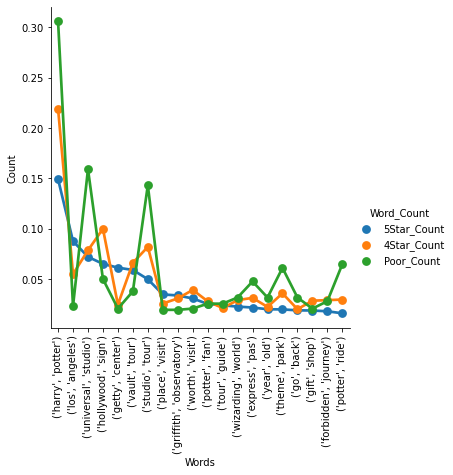

<Figure size 720x360 with 0 Axes>

In [42]:
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count')
combined_words_df_plot = sns.catplot(x="Words", y="Count", hue='Word_Count',
                                     data=combined_words_df_plot, kind='point', 
#                                      alpha = 0.5,
                                     plot_kws=dict(edgecolor="white", linewidth=2.5, alpha=0.3))
plt.figure(figsize=(10,5))
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [43]:
list(set(bigram_words_5star) - set(bigram_words_4star) - set(bigram_words_poor))

[('whole', 'day'),
 ('great', 'day'),
 ('definitely', 'worth'),
 ('well', 'done'),
 ('spend', 'day'),
 ('guided', 'tour'),
 ('much', 'see'),
 ('art', 'collection'),
 ('pay', 'parking'),
 ('must', 'see'),
 ('one', 'best'),
 ('amazing', 'view'),
 ('must', 'visit'),
 ('view', 'los')]

In [44]:
list(set(bigram_words_4star) - set(bigram_words_5star) - set(bigram_words_poor))

[('car', 'enthusiast'),
 ('three', 'broomstick'),
 ('ride', 'great'),
 ('walk', 'around'),
 ('view', 'hollywood'),
 ('car', 'display'),
 ('see', 'hollywood')]

In [45]:
# even taking 'u' and "u" out with the lemmatizer does not actually take the letter out

list(set(bigram_words_poor) - set(bigram_words_4star) - set(bigram_words_5star))

[('fast', 'pas'),
 ('much', 'better'),
 ('ride', 'fun'),
 ('per', 'person'),
 ('many', 'ride'),
 ('year', 'ago'),
 ('express', 'ticket'),
 ('universal', 'orlando'),
 ('special', 'effect'),
 ('ride', 'show'),
 ('motion', 'sickness'),
 ('feel', 'like'),
 ('general', 'admission'),
 ('studio', 'hollywood'),
 ('universal', 'hollywood'),
 ('mummy', 'ride'),
 ('vip', 'experience'),
 ('transformer', 'ride'),
 ('long', 'wait'),
 ('could', 'see'),
 ('many', 'people')]

# Trigram Analysis

In [46]:
# 5 Star Analysis

trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('harry', 'potter', 'fan'), 147),
 (('view', 'los', 'angeles'), 134),
 (('world', 'harry', 'potter'), 106),
 (('harry', 'potter', 'ride'), 104),
 (('harry', 'potter', 'world'), 88),
 (('view', 'hollywood', 'sign'), 84),
 (('wizarding', 'world', 'harry'), 79),
 (('universal', 'studio', 'hollywood'), 78),
 (('petersen', 'automotive', 'museum'), 76),
 (('well', 'worth', 'visit'), 71),
 (('great', 'place', 'visit'), 68),
 (('see', 'hollywood', 'sign'), 67),
 (('would', 'highly', 'recommend'), 56),
 (('worth', 'every', 'penny'), 50),
 (('harry', 'potter', 'forbidden'), 49),
 (('potter', 'forbidden', 'journey'), 47),
 (('visit', 'getty', 'center'), 39),
 (('la', 'hollywood', 'sign'), 38),
 (('definitely', 'worth', 'visit'), 38),
 (('ride', 'harry', 'potter'), 38),
 (('harry', 'potter', 'area'), 38),
 (('forbidden', 'journey', 'ride'), 37),
 (('great', 'view', 'la'), 35),
 (('spend', 'whole', 'day'), 35),
 (('day', 'universal', 'studio'), 34),
 (('special', 'effect', 'show'), 34),
 (('view'

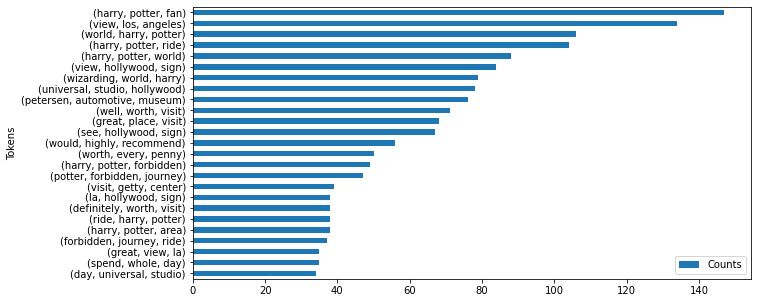

In [47]:
# Graph of 5 Star Trigram

fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [48]:
# 4 Star Analysis

trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('harry', 'potter', 'ride'), 53),
 (('harry', 'potter', 'world'), 47),
 (('harry', 'potter', 'fan'), 45),
 (('view', 'hollywood', 'sign'), 38),
 (('world', 'harry', 'potter'), 33),
 (('see', 'hollywood', 'sign'), 30),
 (('universal', 'studio', 'hollywood'), 27),
 (('wizarding', 'world', 'harry'), 26),
 (('potter', 'forbidden', 'journey'), 23),
 (('jurassic', 'park', 'ride'), 23),
 (('harry', 'potter', 'area'), 22),
 (('petersen', 'automotive', 'museum'), 21),
 (('harry', 'potter', 'forbidden'), 21),
 (('great', 'view', 'la'), 20),
 (('well', 'worth', 'visit'), 20),
 (('la', 'hollywood', 'sign'), 20),
 (('view', 'los', 'angeles'), 19),
 (('great', 'place', 'visit'), 17),
 (('view', 'la', 'hollywood'), 15),
 (('great', 'view', 'hollywood'), 14),
 (('ride', 'harry', 'potter'), 14),
 (('jurassic', 'world', 'ride'), 14),
 (('forbidden', 'journey', 'ride'), 13),
 (('harry', 'potter', 'section'), 13),
 (('great', 'view', 'city'), 12),
 (('would', 'highly', 'recommend'), 12),
 (('special', '

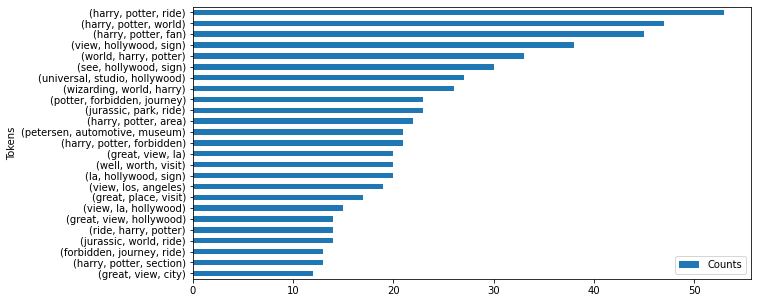

In [49]:
# Graph of 4 Star Trigram

fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [50]:
# Poor Analysis

trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('harry', 'potter', 'ride'), 53),
 (('harry', 'potter', 'world'), 28),
 (('universal', 'studio', 'hollywood'), 20),
 (('world', 'harry', 'potter'), 16),
 (('jurassic', 'park', 'ride'), 15),
 (('harry', 'potter', 'fan'), 14),
 (('special', 'effect', 'show'), 14),
 (('wizarding', 'world', 'harry'), 13),
 (('ride', 'harry', 'potter'), 12),
 (('back', 'lot', 'tour'), 12),
 (('harry', 'potter', 'area'), 10),
 (('harry', 'potter', 'land'), 10),
 (('see', 'hollywood', 'sign'), 9),
 (('go', 'universal', 'studio'), 9),
 (('harry', 'potter', 'section'), 9),
 (('kung', 'fu', 'panda'), 8),
 (('universal', 'studio', 'orlando'), 8),
 (('harry', 'potter', 'forbidden'), 7),
 (('potter', 'forbidden', 'journey'), 7),
 (('visit', 'universal', 'studio'), 7),
 (('universal', 'studio', 'tour'), 7),
 (('studio', 'tour', 'good'), 7),
 (('fast', 'pas', 'ticket'), 7),
 (('park', 'studio', 'tour'), 7),
 (('would', 'go', 'back'), 6),
 (('forbidden', 'journey', 'ride'), 6),
 (('ride', 'studio', 'tour'), 6),
 (('

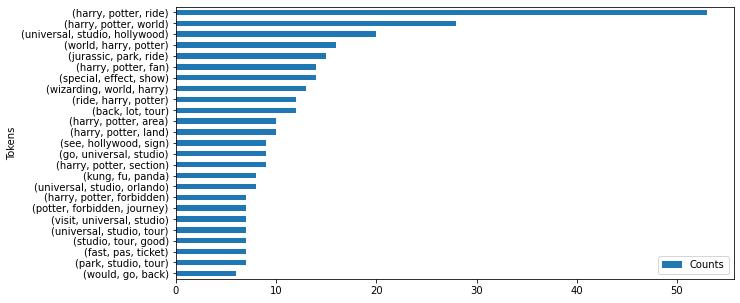

In [51]:
# Graph of Poor Bigram

fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [52]:
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('harry', 'potter', 'fan'),
 ('view', 'los', 'angeles'),
 ('world', 'harry', 'potter'),
 ('harry', 'potter', 'ride'),
 ('harry', 'potter', 'world'),
 ('view', 'hollywood', 'sign'),
 ('wizarding', 'world', 'harry'),
 ('universal', 'studio', 'hollywood'),
 ('petersen', 'automotive', 'museum'),
 ('well', 'worth', 'visit'),
 ('great', 'place', 'visit'),
 ('see', 'hollywood', 'sign'),
 ('would', 'highly', 'recommend'),
 ('worth', 'every', 'penny'),
 ('harry', 'potter', 'forbidden'),
 ('potter', 'forbidden', 'journey'),
 ('visit', 'getty', 'center'),
 ('la', 'hollywood', 'sign'),
 ('definitely', 'worth', 'visit'),
 ('ride', 'harry', 'potter'),
 ('harry', 'potter', 'area'),
 ('forbidden', 'journey', 'ride'),
 ('great', 'view', 'la'),
 ('spend', 'whole', 'day'),
 ('day', 'universal', 'studio'),
 ('special', 'effect', 'show'),
 ('view', 'la', 'hollywood'),
 ('jurassic', 'park', 'ride'),
 ('visit', 'los', 'angeles'),
 ('tour', 'well', 'worth'),
 ('great', 'view', 'city'),
 ('los', 'angeles', 'a

In [53]:
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('harry', 'potter', 'ride'),
 ('harry', 'potter', 'world'),
 ('harry', 'potter', 'fan'),
 ('view', 'hollywood', 'sign'),
 ('world', 'harry', 'potter'),
 ('see', 'hollywood', 'sign'),
 ('universal', 'studio', 'hollywood'),
 ('wizarding', 'world', 'harry'),
 ('potter', 'forbidden', 'journey'),
 ('jurassic', 'park', 'ride'),
 ('harry', 'potter', 'area'),
 ('petersen', 'automotive', 'museum'),
 ('harry', 'potter', 'forbidden'),
 ('great', 'view', 'la'),
 ('well', 'worth', 'visit'),
 ('la', 'hollywood', 'sign'),
 ('view', 'los', 'angeles'),
 ('great', 'place', 'visit'),
 ('view', 'la', 'hollywood'),
 ('great', 'view', 'hollywood'),
 ('ride', 'harry', 'potter'),
 ('jurassic', 'world', 'ride'),
 ('forbidden', 'journey', 'ride'),
 ('harry', 'potter', 'section'),
 ('great', 'view', 'city'),
 ('would', 'highly', 'recommend'),
 ('special', 'effect', 'show'),
 ('single', 'rider', 'line'),
 ('water', 'world', 'show'),
 ('city', 'hollywood', 'sign'),
 ('definitely', 'worth', 'visit'),
 ('spend', 'w

In [54]:
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('harry', 'potter', 'ride'),
 ('harry', 'potter', 'world'),
 ('universal', 'studio', 'hollywood'),
 ('world', 'harry', 'potter'),
 ('jurassic', 'park', 'ride'),
 ('harry', 'potter', 'fan'),
 ('special', 'effect', 'show'),
 ('wizarding', 'world', 'harry'),
 ('ride', 'harry', 'potter'),
 ('back', 'lot', 'tour'),
 ('harry', 'potter', 'area'),
 ('harry', 'potter', 'land'),
 ('see', 'hollywood', 'sign'),
 ('go', 'universal', 'studio'),
 ('harry', 'potter', 'section'),
 ('kung', 'fu', 'panda'),
 ('universal', 'studio', 'orlando'),
 ('harry', 'potter', 'forbidden'),
 ('potter', 'forbidden', 'journey'),
 ('visit', 'universal', 'studio'),
 ('universal', 'studio', 'tour'),
 ('studio', 'tour', 'good'),
 ('fast', 'pas', 'ticket'),
 ('park', 'studio', 'tour'),
 ('would', 'go', 'back'),
 ('forbidden', 'journey', 'ride'),
 ('ride', 'studio', 'tour'),
 ('water', 'world', 'show'),
 ('single', 'rider', 'line'),
 ('view', 'hollywood', 'sign'),
 ('fan', 'harry', 'potter'),
 ('love', 'harry', 'potter'),
 

In [55]:
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('wizarding', 'world', 'harry'),
 ('harry', 'potter', 'area'),
 ('visit', 'universal', 'studio'),
 ('harry', 'potter', 'fan'),
 ('harry', 'potter', 'world'),
 ('forbidden', 'journey', 'ride'),
 ('ride', 'harry', 'potter'),
 ('harry', 'potter', 'forbidden'),
 ('universal', 'studio', 'hollywood'),
 ('special', 'effect', 'show'),
 ('jurassic', 'world', 'ride'),
 ('jurassic', 'park', 'ride'),
 ('view', 'hollywood', 'sign'),
 ('world', 'harry', 'potter'),
 ('see', 'hollywood', 'sign'),
 ('harry', 'potter', 'ride'),
 ('potter', 'forbidden', 'journey'),
 ('love', 'harry', 'potter')]

In [56]:
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_5star_tri_count))

words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])
words_5star_tri_count_df

18


,Words,5Star_Count
0,"(harry, potter, fan)",147
1,"(world, harry, potter)",106
2,"(harry, potter, ride)",104
3,"(harry, potter, world)",88
4,"(view, hollywood, sign)",84
5,"(wizarding, world, harry)",79
6,"(universal, studio, hollywood)",78
7,"(see, hollywood, sign)",67
8,"(harry, potter, forbidden)",49
9,"(potter, forbidden, journey)",47


In [57]:
words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_4star_tri_count))


words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])
words_4star_tri_count_df

18


,Words,4Star_Count
0,"(harry, potter, ride)",53
1,"(harry, potter, world)",47
2,"(harry, potter, fan)",45
3,"(view, hollywood, sign)",38
4,"(world, harry, potter)",33
5,"(see, hollywood, sign)",30
6,"(universal, studio, hollywood)",27
7,"(wizarding, world, harry)",26
8,"(potter, forbidden, journey)",23
9,"(jurassic, park, ride)",23


In [58]:
words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50) if tup[0] in trigram_common_words]
print(len(words_poor_tri_count))

words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])
words_poor_tri_count_df

18


,Words,Poor_Count
0,"(harry, potter, ride)",53
1,"(harry, potter, world)",28
2,"(universal, studio, hollywood)",20
3,"(world, harry, potter)",16
4,"(jurassic, park, ride)",15
5,"(harry, potter, fan)",14
6,"(special, effect, show)",14
7,"(wizarding, world, harry)",13
8,"(ride, harry, potter)",12
9,"(harry, potter, area)",10


In [59]:
from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(harry, potter, fan)",147,45,14
1,"(world, harry, potter)",106,33,16
2,"(harry, potter, ride)",104,53,53
3,"(harry, potter, world)",88,47,28
4,"(view, hollywood, sign)",84,38,5
5,"(wizarding, world, harry)",79,26,13
6,"(universal, studio, hollywood)",78,27,20
7,"(see, hollywood, sign)",67,30,9
8,"(harry, potter, forbidden)",49,21,7
9,"(potter, forbidden, journey)",47,23,7


In [60]:
combined_words_tri_df[['5Star_Count']] = combined_words_tri_df[['5Star_Count']]/count_5star_ttl
combined_words_tri_df[['4Star_Count']] = combined_words_tri_df[['4Star_Count']]/count_5star_ttl
combined_words_tri_df[['Poor_Count']] = combined_words_tri_df[['Poor_Count']]/count_5star_ttl
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(harry, potter, fan)",0.022812,0.006983,0.002173
1,"(world, harry, potter)",0.016449,0.005121,0.002483
2,"(harry, potter, ride)",0.016139,0.008225,0.008225
3,"(harry, potter, world)",0.013656,0.007294,0.004345
4,"(view, hollywood, sign)",0.013035,0.005897,0.000776
5,"(wizarding, world, harry)",0.012259,0.004035,0.002017
6,"(universal, studio, hollywood)",0.012104,0.004190,0.003104
7,"(see, hollywood, sign)",0.010397,0.004655,0.001397
8,"(harry, potter, forbidden)",0.007604,0.003259,0.001086
9,"(potter, forbidden, journey)",0.007294,0.003569,0.001086


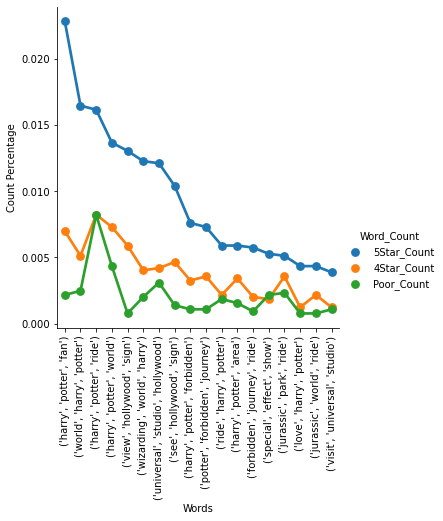

<Figure size 720x360 with 0 Axes>

In [61]:
combined_words_tri_df_plot = combined_words_tri_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_tri_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count', 
                                         data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [62]:
trigram_words_5star_only = list(set(trigram_words_5star) - set(trigram_words_4star) - set(trigram_words_poor))
trigram_words_5star_only

[('visit', 'los', 'angeles'),
 ('worth', 'every', 'penny'),
 ('brea', 'tar', 'pit'),
 ('free', 'pay', 'parking'),
 ('highly', 'recommend', 'visit'),
 ('rebel', 'without', 'cause'),
 ('must', 'see', 'la'),
 ('year', 'old', 'son'),
 ('tour', 'well', 'worth'),
 ('great', 'view', 'los'),
 ('los', 'angeles', 'area'),
 ('vault', 'tour', 'well'),
 ('see', 'los', 'angeles'),
 ('great', 'place', 'spend'),
 ('visit', 'griffith', 'observatory'),
 ('visit', 'getty', 'center'),
 ('would', 'definitely', 'recommend'),
 ('la', 'brea', 'tar')]

In [63]:
trigram_words_4star_only = list(set(trigram_words_4star) - set(trigram_words_5star) - set(trigram_words_poor))
trigram_words_4star_only

[('hollywood', 'sign', 'la'),
 ('go', 'vault', 'tour'),
 ('show', 'special', 'effect'),
 ('great', 'view', 'hollywood'),
 ('great', 'way', 'spend'),
 ('animal', 'actor', 'show'),
 ('visited', 'universal', 'studio'),
 ('harry', 'potter', 'experience'),
 ('halloween', 'horror', 'night'),
 ('hollywood', 'sign', 'great'),
 ('good', 'view', 'hollywood'),
 ('enjoyed', 'studio', 'tour')]

In [64]:
trigram_words_poor_only = list(set(trigram_words_poor) - set(trigram_words_5star) - set(trigram_words_4star))
trigram_words_poor_only

[('ride', 'transformer', 'ride'),
 ('still', 'worth', 'visit'),
 ('ride', 'jurassic', 'park'),
 ('huge', 'harry', 'potter'),
 ('picture', 'hollywood', 'sign'),
 ('universal', 'studio', 'florida'),
 ('fast', 'pas', 'ticket'),
 ('orlando', 'much', 'better'),
 ('went', 'harry', 'potter'),
 ('universal', 'studio', 'tour'),
 ('went', 'universal', 'studio'),
 ('fan', 'harry', 'potter'),
 ('never', 'go', 'back'),
 ('ride', 'studio', 'tour'),
 ('universal', 'studio', 'orlando'),
 ('park', 'studio', 'tour'),
 ('hollywood', 'sign', 'parking'),
 ('would', 'go', 'back'),
 ('studio', 'tour', 'good'),
 ('mile', 'away', 'walk'),
 ('revenge', 'mummy', 'ride'),
 ('go', 'universal', 'studio'),
 ('waste', 'time', 'money'),
 ('harry', 'potter', 'simpson')]

# Analysis of Helpful Reviews

In [65]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
10684,Griffith Observatory,Los Angeles,2019-04-01,2019-03-01,9,2,1,Poor,"The Observatory is FREE, and a great place for...",Parking a nightmare at Griffith Observatory,LocationVacation,NEW DELHI,INDIA,,,
13459,Universal Studios Hollywood,Los Angeles,2020-01-01,2019-12-01,64,33,2,5,Love Universal. Been 3 times in the past 27 ye...,My place to go,Maxine Colette A,SERPENTINE,AUSTRALIA,,,
13340,Universal Studios Hollywood,Los Angeles,2019-12-01,2019-09-01,86,67,2,4,"You can do the park in a day, but 2 days would...",A must visit.,Jacqueline R,BRISBANE,AUSTRALIA,,,
11749,Universal Studios Hollywood,Los Angeles,2019-01-01,2018-10-01,17,37,1,Poor,We paid for the VIP one-day tour / visit to Un...,"Good, Not Great (and way worse than Florida)",wheatswheats,CALGARY,,,,
13088,Universal Studios Hollywood,Los Angeles,2019-09-01,2019-09-01,3,0,1,5,Universal studios is amazing! We were lucky to...,Excellent to visit if you have a day to spare ...,Payshow,,,,,
13092,Universal Studios Hollywood,Los Angeles,2019-09-01,2019-09-01,15,15,1,5,Me & my partner didn’t know exactly what to ex...,Brilliant,Elizabeth M,NORWICH,UNITED KINGDOM,,,
10875,Griffith Observatory,Los Angeles,2019-05-01,2019-05-01,155,55,2,Poor,"Parking, either at the top or in a lot below (...",Hassle to get there but views are worth it.,Dr. Bob,TUCSON,AZ,,,
10712,Griffith Observatory,Los Angeles,2019-04-01,2019-04-01,14,8,1,5,We tried to make it to the Observatory at nigh...,Beautiful Place,Bobbi111,BATAVIA,OH,,,
17254,The Getty Center,Los Angeles,2018-07-01,2018-07-01,135,21,1,5,"If you’re visiting town, stop by and enjoy the...",A must see in LA,Magli G,LOS ANGELES,CA,,,
11951,Universal Studios Hollywood,Los Angeles,2019-02-01,2019-02-01,13,7,1,4,"We have never been to Universal in Florida, so...",Can do in one day,Danielle,NEW YORK CITY,NY,,,


In [66]:
helpful_total = len(ta_5vspoor_helpful_df)
helpful_total

1769

In [67]:
helpful_5star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5])
helpful_5star

1171

In [68]:
helpful_4star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4])
helpful_4star

340

In [69]:
helpful_poor = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'])
helpful_poor

258

In [70]:
count_5star_ttl

6444

In [71]:
count_4star_ttl

1780

In [72]:
count_poor_ttl

817

In [73]:
# Helpful reviews that gave 5 stars

helpful_5star/count_5star_ttl

0.18171942892613283

In [74]:
# Helpful reviews that gave 4 stars

helpful_4star/count_4star_ttl

0.19101123595505617

In [75]:
# Helpful reviews that gave 3 or fewer stars

helpful_poor/count_poor_ttl

0.3157894736842105

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

In [76]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
13397,Universal Studios Hollywood,Los Angeles,2019-12-01,2019-12-01,1,4,3,Poor,Where do I begin? I guess my biggest problem w...,Lame.,Carmella A,,,,,
13520,Universal Studios Hollywood,Los Angeles,2020-01-01,2020-01-01,2,2,1,Poor,I will start out by saying the studio tour att...,A money grabbing machine with a few noteworthy...,Melanie E,,,,,
16641,The Wizarding World of Harry Potter,Los Angeles,2019-09-01,2019-08-01,42,14,1,Poor,We have been lucky enough to visit WWHP in Flo...,Disappointing,Jayne G,ESSEX,UNITED KINGDOM,,,
11958,Universal Studios Hollywood,Los Angeles,2019-02-01,2019-02-01,3,2,2,Poor,Universal ask us to buy into their fantasy wor...,Why so expensive,ken17b,LONDON,UNITED KINGDOM,,,
12968,Universal Studios Hollywood,Los Angeles,2019-09-01,2019-08-01,5,2,1,Poor,Be aware that Bad people go to this place to p...,Be careful!!!,ANNELLE615,LAFAYETTE,CO,,,
13458,Universal Studios Hollywood,Los Angeles,2020-01-01,2020-01-01,1,1,1,Poor,As my first time at the park in my 40+ years o...,"First Time, Glad I did it, not aching to go back.",Jon C,YELAPA,MEXICO,,,
13279,Universal Studios Hollywood,Los Angeles,2019-11-01,NaT,25,27,2,Poor,My last trip to Universal Hollywood was about ...,Quality has disappeared,phohmann,GREENVILLE,SC,,,
11050,Griffith Observatory,Los Angeles,2019-07-01,2019-07-01,161,87,1,Poor,Typical visit in LA bucket list but not meet o...,Just OK,Acivipam,MADRID,SPAIN,,,
13579,Universal Studios Hollywood,Los Angeles,2020-02-01,2020-02-01,94,48,2,Poor,"A lot of the rides are of the virtual reality,...",Bit meh!,brainy_banana,PRESTON,UNITED KINGDOM,,,
17968,The Getty Center,Los Angeles,2019-03-01,2018-11-01,67,34,1,Poor,I am at a loss how this is rated #1 on Trip Ad...,"Interesting Architecture, Great Views, but f...",sedrake,RIVERSIDE,CA,,,


In [77]:
ta_5vspoor_helpful_df.loc[13397, 'Text']

"Where do I begin? I guess my biggest problem with Universal Studios is the park's total reliance upon 3D rides. I am a thrill ride enthusiast, and 3D rides are not thrill rides. 3D rides are boring, especially over and over again. Randomly shooting mist or water at riders seems to be the park's one method of trying to make the 3D ride experiences more engaging, but the strategy fails. My next biggest problem has to do with the prohibition of backpacks and other like items on the so-called thrill rides. The locker areas next to the thrill rides are grossly overcrowded, probably unsafe, and stupid. I could go on with other negatives, but I'll leave this review at the two complaints I stated. In summary and conclusion, Universal Studios Hollywood is barely worth your time and is certainly not worth the amount of money that you will have to pay to park your car, to enter the park and to eat the food in the park. Pass."

In [78]:
ta_5vspoor_helpful_df.head()

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,96,20,1,4,"Before venturing up, make sure that nothing is...",Getting there was the main problem,pmf,,,,,
9787,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,8,6,1,Poor,From the griff I could not see the Hollywood s...,Not good,m00dymargret,LAS VEGAS,NV,,,
9789,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,38,27,1,5,My family and I were planning to watch the sun...,Breathtaking,Salma,CASCAIS,PORTUGAL,,,
9799,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,103,26,1,Poor,"Title sums it up, all you will do is sit in tr...",Gave up due to traffic to get in,legodude1983,MAASSLUIS,THE NETHERLANDS,,,
9803,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,33,39,2,5,If you are going to Griffith Observatory durin...,Great view of the city,Adyescu,WATERLOO,,,,


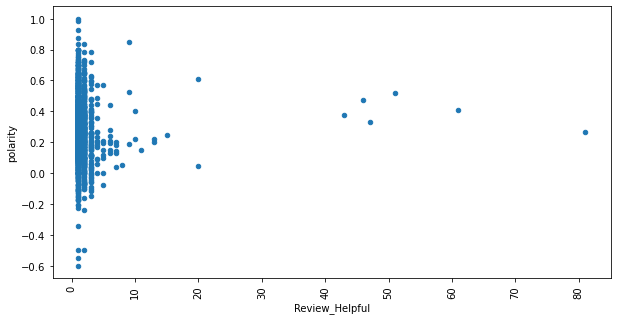

In [79]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_helpful_df)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_5vspoor_helpful_df.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Review_Helpful', 'polarity').tick_params(axis='x', labelrotation = 90)

- Helpful reviews tend to be more positive

### Analysis of Review Text Polarity of the 20 most helpful users

In [80]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
16183,The Wizarding World of Harry Potter,Los Angeles,2017-10-01,2017-10-01,"7,455",980,0,5,This is a must visit. Even non Harry Potter fa...,Definitely Universal's Top Attraction,doctorfoxtrot,TAGUIG CITY,PHILIPPINES,,,
14099,Petersen Automotive Museum,Los Angeles,2014-12-01,2014-06-01,"2,613",974,0,5,"If you are into cars, you will live this museu...",Car guy/gal heave,CarmichaelVentura,CALIFORNIA,,,,
14102,Petersen Automotive Museum,Los Angeles,2014-10-01,2014-06-01,"2,613",974,0,5,I've been crazy about cars all my life. My fir...,I'm a car nut,CarmichaelVentura,CALIFORNIA,,,,
18298,The Getty Center,Los Angeles,2019-08-01,2019-08-01,799,951,1,5,The Getty Center is the finest museum venue bu...,The Best Museum Venue Built in the last 100 years,Dana Los Angeles,LOS ANGELES,CA,,,
12827,Universal Studios Hollywood,Los Angeles,2019-08-01,2019-08-01,799,951,1,5,"An epic venue that is part studio, part amusem...","An epic venue that is part studio, part amusem...",Dana Los Angeles,LOS ANGELES,CA,,,
14954,Petersen Automotive Museum,Los Angeles,2017-10-01,2017-09-01,720,929,0,5,We booked a tour that included a visit to The ...,Unbelievable collection of automobiles,Steve M,REDCAR,UNITED KINGDOM,,,
17843,The Getty Center,Los Angeles,2019-01-01,2019-01-01,"2,508",922,0,Poor,Our family has enjoyed going to many famous mu...,Always wanted to see the Getty,minnesotans4,SAINT PAUL,MN,,,
17668,The Getty Center,Los Angeles,2018-11-01,2018-11-01,"3,707",860,0,5,The best art museum I've been to a n a long ti...,"Fabulous in every respect, An absolute must see",Chinapjs,WASHINGTON DC,DC,,,
15724,The Wizarding World of Harry Potter,Los Angeles,2016-06-01,2016-06-01,"3,758",851,0,5,This is THE attraction of the Universal. And t...,Super crowded..,BhawaniPathania,MUMBAI,INDIA,,,
14167,Petersen Automotive Museum,Los Angeles,2015-08-01,2014-09-01,759,843,0,5,Located at the corner of Fairfax and Wilshire ...,Motoring Mecca!,etweeden,LONDON,UNITED KINGDOM,,,


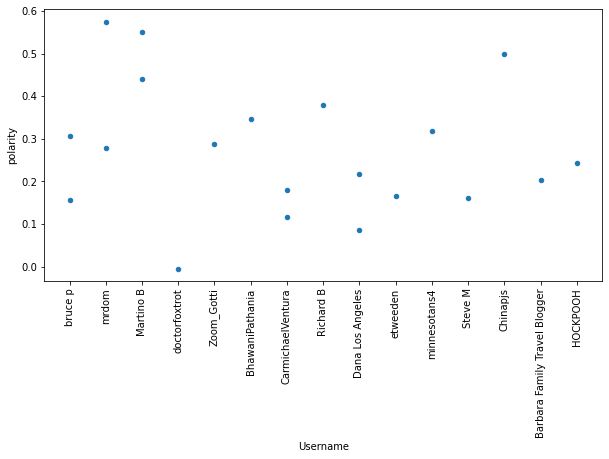

In [81]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [82]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
16183,doctorfoxtrot,980,The Wizarding World of Harry Potter,This is a must visit. Even non Harry Potter fa...
14099,CarmichaelVentura,974,Petersen Automotive Museum,"If you are into cars, you will live this museu..."
14102,CarmichaelVentura,974,Petersen Automotive Museum,I've been crazy about cars all my life. My fir...
18298,Dana Los Angeles,951,The Getty Center,The Getty Center is the finest museum venue bu...
12827,Dana Los Angeles,951,Universal Studios Hollywood,"An epic venue that is part studio, part amusem..."
14954,Steve M,929,Petersen Automotive Museum,We booked a tour that included a visit to The ...
17843,minnesotans4,922,The Getty Center,Our family has enjoyed going to many famous mu...
17668,Chinapjs,860,The Getty Center,The best art museum I've been to a n a long ti...
15724,BhawaniPathania,851,The Wizarding World of Harry Potter,This is THE attraction of the Universal. And t...
14167,etweeden,843,Petersen Automotive Museum,Located at the corner of Fairfax and Wilshire ...


### Dirk W's Reviews and polarity assessment

In [84]:
print(helpful_users_condensed.loc[15407, 'Attraction'])
helpful_users_condensed.loc[15407, 'Text']

Petersen Automotive Museum


'So many significant vehicles, from movie props to race winners to customs, plus a collections of electrics and a lot of info on the car industry, all beautifully presented in a crazy-looking building.'

In [85]:
print(helpful_users_condensed.loc[10871, 'Attraction'])
helpful_users_condensed.loc[10871, 'Text']

Griffith Observatory


'I could have gotten a bus bus I figured I would be driving nearby later in the trip so I’d go then. Unfortunately, the top car park was full so I parked at the Greek Theatre. Poor signage from there but easy to find the observatory because you have to walk up the busy road - I really thought a park like this would have better paths. The observatory is worth it though, a gorgeous building with some of the best views in L.A. and a good exhibit about astronomy.'

# Text Polarity/Basic Sentiment Analysis

In [86]:
from textblob import TextBlob

sample_size = len(ta_5vspoor)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

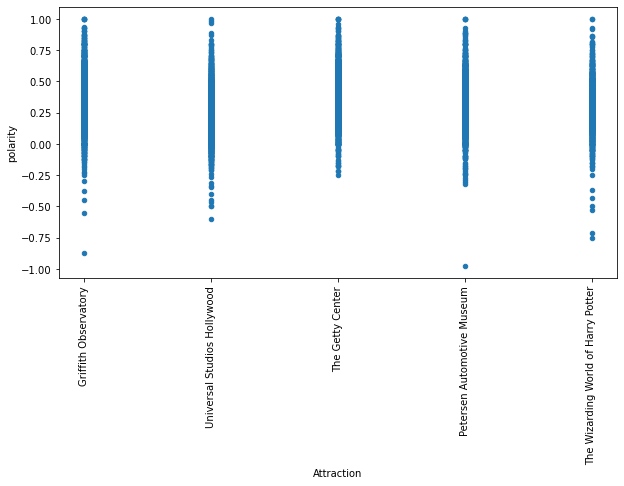

In [87]:
sample = ta_5vspoor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Month and Year

In [88]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
17836,2019-01-01,4
10298,2018-07-01,5
11485,2019-08-01,Poor
16248,2018-01-01,5
13150,2019-06-01,5
15720,2016-06-01,5
12198,2019-04-01,Poor
11675,2020-03-01,Poor
16914,2018-04-01,5
11915,2018-09-01,5


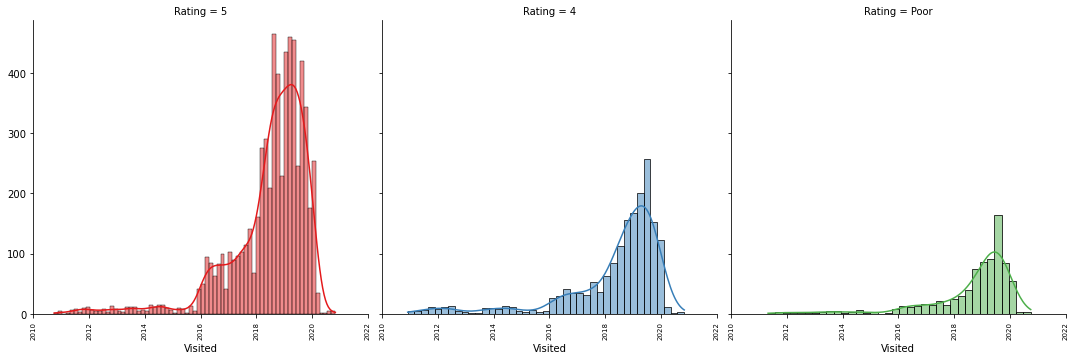

In [89]:
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=5, 
                             aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid.map(sns.histplot, "Visited", kde=True)

visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

### Analyzing Ratings of Specific Attractions

In [92]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='The Getty Center')]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
3975,The Getty Center,Los Angeles,2018-02-01,2018-02-01,32,14,0,4,Wow. This place is huge. There is a train that...,"Free, free, free.",spunkeemunkee,TOOWOOMBA,AUSTRALIA,,,
3976,The Getty Center,Los Angeles,2018-02-01,2018-02-01,237,20,0,5,We always visit The Getty Center when we visit...,Impressive as always,StrictlyOurOpinion,SYDNEY,AUSTRALIA,,,
3977,The Getty Center,Los Angeles,2018-02-01,2018-01-01,118,25,0,5,The Getty Center is an impressive place to vis...,Outstanding exhibitions,Daniel M,AUCKLAND,NEW ZEALAND,,,
3978,The Getty Center,Los Angeles,2018-02-01,2018-01-01,11,1,0,5,"It is truly a work of art in its own right, an...",Outstanding!,Jerry H,,,,,
3979,The Getty Center,Los Angeles,2018-02-01,2017-09-01,11,5,0,5,To enter the center you will have to register ...,"What a place, Rome and Greece in california",tyzon12,BUENOS AIRES,ARGENTINA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34625,The Getty Center,Los Angeles,2018-10-01,2018-09-01,3,1,1,5,So happy we included this venue. A lovely day ...,Great day!,Kathleen M,,,,,
34626,The Getty Center,Los Angeles,2019-02-01,2018-11-01,138,36,0,5,We enjoyed ourselves so much at the Getty Cent...,Amazing museum,TamEliSha,BERGEN,THE NETHERLANDS,,,
34628,The Getty Center,Los Angeles,2018-10-01,2018-09-01,79,45,1,5,Even if you just walked around the grounds you...,Stunning architecture and views. The art is a ...,Ros_Mel2014,MELBOURNE,AUSTRALIA,,,
34630,The Getty Center,Los Angeles,2018-10-01,2018-08-01,113,124,2,5,I can never really get enough of The Getty Cen...,"Great for art, architecture and a view of Los ...",Kirsten A,LOS ANGELES,CA,,,


In [93]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
17816,2019-01-01,5
18392,2019-07-01,4
16774,2018-02-01,4
17178,2018-05-01,4
16737,2018-02-01,5
17899,2019-02-01,5
16985,2018-04-01,5
17565,2018-10-01,5
18269,2019-05-01,5
17675,2018-11-01,5


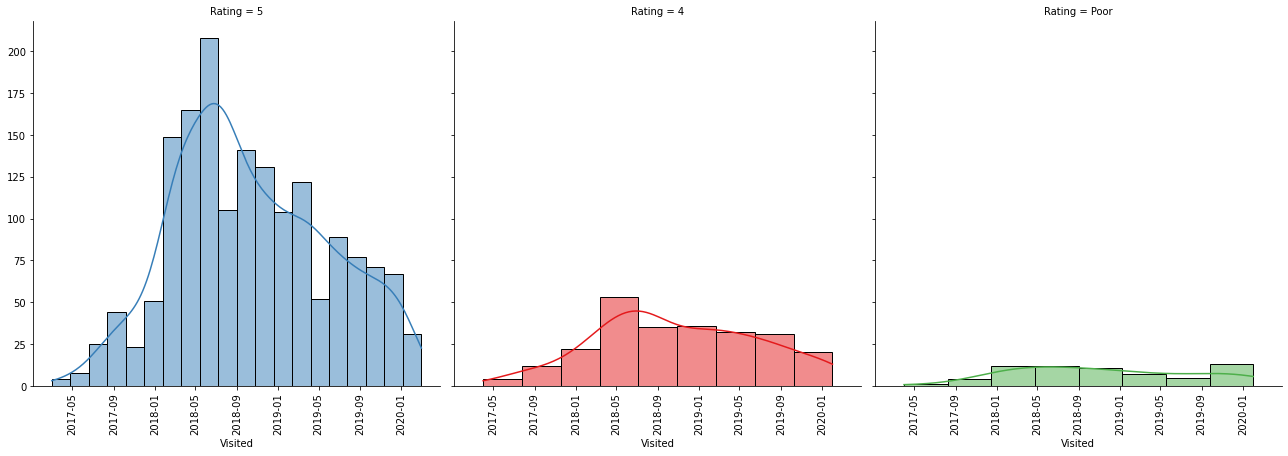

In [94]:
visited_grid_1 = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_1.map(sns.histplot, "Visited", kde=True)

visited_grid_1.set_xticklabels(rotation='vertical', fontsize=10)

- There were fewer poor ratings in the summer/fall of 2019
- This seems to indicate the later reviews may be better overall during the seasonal spike

In [95]:
ta_5vspoor_2 = ta_5vspoor[(ta_5vspoor['Attraction']=='Griffith Observatory')]
ta_5vspoor_2

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
20,Griffith Observatory,Los Angeles,2018-08-01,2018-07-01,797,172,0,5,We got lucky and found a parking place near th...,"""Great Views of LA""",86MissyJ,WHEELERSBURG,OH,,,
21,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,26,25,0,5,Probably my favourite place in LA! The view ov...,Best place to look at LA rom above!,Hristo Z,PLOVDIV,BULGARIA,,,
22,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,65,19,0,5,"Went on a sunny Sunday afternoon, along with m...",Fabulous views of LA,Pippadina2,GLASGOW,UNITED KINGDOM,,,
23,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,96,20,1,4,"Before venturing up, make sure that nothing is...",Getting there was the main problem,pmf,,,,,
24,Griffith Observatory,Los Angeles,2018-08-01,2018-08-01,26,2,0,4,Amazing place to visit..full of interesting in...,Griffith Observatory,Karen W,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34735,Griffith Observatory,Los Angeles,2019-01-01,2019-01-01,61,50,2,5,Just breathtaking. Loved it. The breeze was gr...,Cant get any better for views!!!,Khristina A,LADYSMITH,VA,,,
34736,Griffith Observatory,Los Angeles,2018-10-01,2017-11-01,3,1,0,5,"Amazing place during the daily, but i still ha...",Daily trip,daniela_aschei,LOS ANGELES,CA,,,
34737,Griffith Observatory,Los Angeles,2019-01-01,2019-01-01,613,248,0,5,Great spot for watching the sunset - we came i...,Great views,Domi,LONDON,UNITED KINGDOM,,,
34738,Griffith Observatory,Los Angeles,2018-10-01,2018-07-01,113,124,3,5,Go early in the day for best chance at parking...,Crowded at times but so worth it,Kirsten A,LOS ANGELES,CA,,,


In [96]:
ta_5vspoor_2_df = ta_5vspoor_2.loc[:, ['Visited', 'Rating']]
ta_5vspoor_2_df.sample(15)

,Visited,Rating
9812,2018-08-01,5
10513,2018-09-01,5
10937,2019-06-01,4
10758,2019-03-01,5
10220,2018-11-01,5
9999,2018-09-01,4
11285,2019-09-01,5
10824,2019-04-01,5
9905,2018-09-01,Poor
10687,2019-03-01,Poor


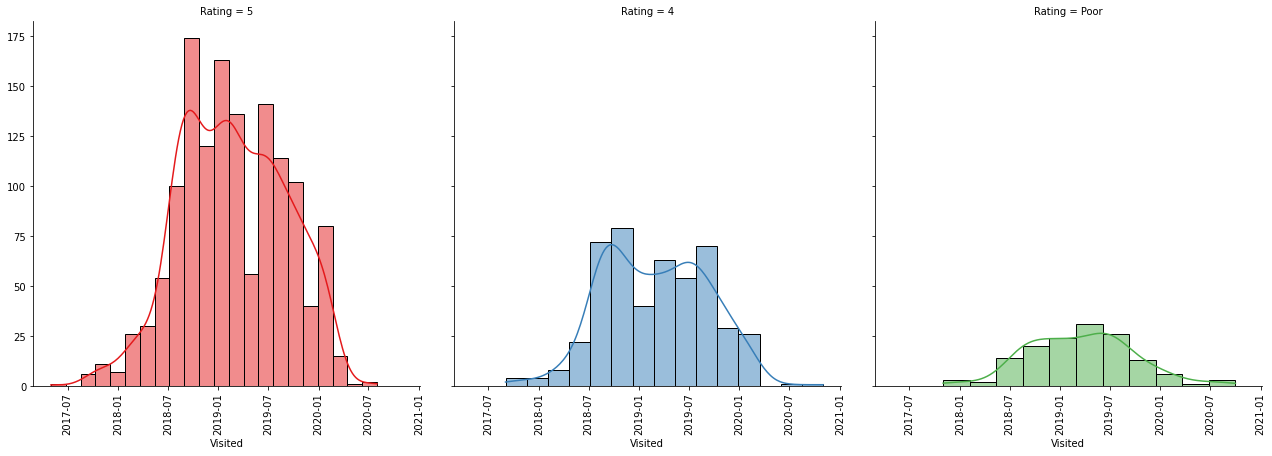

In [97]:
visited_grid_2 = sns.FacetGrid(data=ta_5vspoor_2_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_2.map(sns.histplot, "Visited", kde=True)

visited_grid_2.set_xticklabels(rotation='vertical', fontsize=10)

- Based on what we can see from the poor ratings histogram from Fenway Park, we may be able to conjecture that the significant increase in poor ratings in Boston was caused by this uptake

In [98]:
ta_5vspoor_3 = ta_5vspoor[(ta_5vspoor['Attraction']=='Universal Studios Hollywood')]
ta_5vspoor_3

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
5974,Universal Studios Hollywood,Los Angeles,2019-01-01,2019-01-01,77,19,0,4,"We took a ""behind the scenes"" tour and enjoyed...",Behind The Scenes Tour,Nadine F,TIFFIN,OH,UNITED STATES,,
5975,Universal Studios Hollywood,Los Angeles,2019-01-01,2018-08-01,60,21,0,5,We love the Wizarding World for Harry Potter! ...,Harry Potter Fan!,lorihas2,,,,,
5976,Universal Studios Hollywood,Los Angeles,2019-01-01,2018-07-01,"1,391",68,0,Poor,We had huge expectations for our visit. The fa...,Huge disappointment - not worth the money,MisterTNorway,AS,NORWAY,,,
5977,Universal Studios Hollywood,Los Angeles,2019-01-01,2018-11-01,37,5,0,5,"I had an annual pass, was so nice to go for fe...",I love this place,AaronB,LOS ANGELES,CA,,,
5978,Universal Studios Hollywood,Los Angeles,2019-01-01,2019-01-01,31,8,0,5,"We went on Thursday, Jan. 3, and it was as pac...",Top rate theme park - but PACKED in peak season,jessepisors,VICTORIA,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34690,Universal Studios Hollywood,Los Angeles,2019-09-01,2019-09-01,33,6,2,5,This park is worth the money you give for the ...,One of a kind! The Express ticket helps a lot...,Rıza Mert,ANKARA,TURKEY,,,
34691,Universal Studios Hollywood,Los Angeles,2019-08-01,2019-08-01,751,188,1,4,"It is hard not to compare Universal to Disney,...",Enjoyable,TravelinJabbo,EAU CLAIRE,WI,,,
34692,Universal Studios Hollywood,Los Angeles,2019-09-01,2019-09-01,41,10,1,5,Love this place lots to do foo and drink bit o...,D,Diane R,WARRINGTON,UNITED KINGDOM,,,
34693,Universal Studios Hollywood,Los Angeles,2019-08-01,2019-04-01,9,2,1,Poor,It is a cool place to visit. A pass is needed ...,Crowded,Alissa V,,,,,


In [99]:
ta_5vspoor_3_df = ta_5vspoor_3.loc[:, ['Visited', 'Rating']]
ta_5vspoor_3_df.sample(15)

,Visited,Rating
12980,2019-04-01,5
12364,2018-06-01,5
12088,2018-12-01,Poor
13064,2019-09-01,5
13198,2019-10-01,5
13440,2019-12-01,5
11857,2019-01-01,5
12336,2019-05-01,Poor
13585,2019-03-01,5
12447,2019-06-01,4


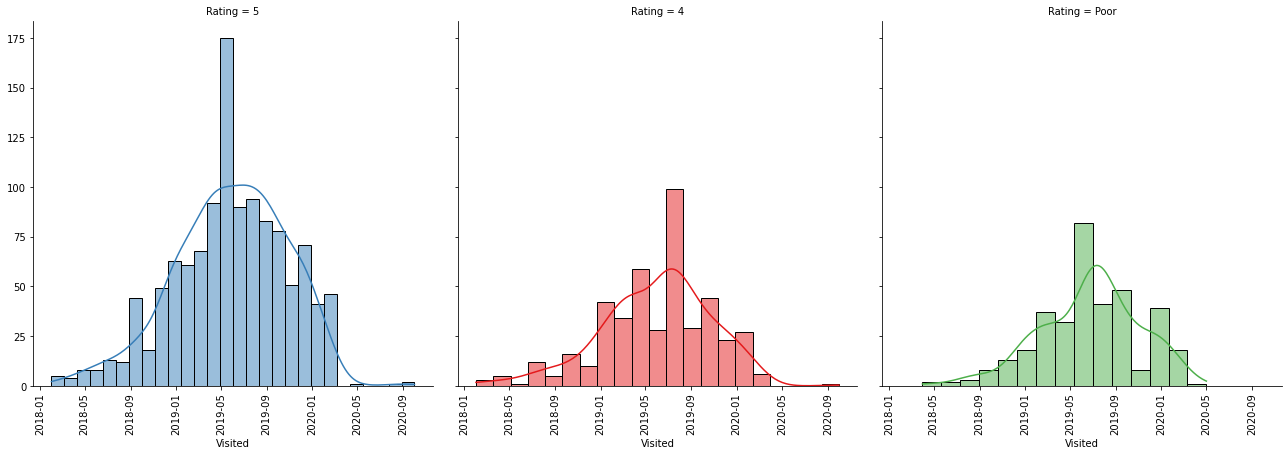

In [100]:
visited_grid_3 = sns.FacetGrid(data=ta_5vspoor_3_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_3.map(sns.histplot, "Visited", kde=True)

visited_grid_3.set_xticklabels(rotation='vertical', fontsize=10)

In [101]:
ta_5vspoor_4 = ta_5vspoor[(ta_5vspoor['Attraction']=='Petersen Automotive Museum')]
ta_5vspoor_4

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
13715,Petersen Automotive Museum,Los Angeles,2010-05-01,NaT,496,190,1,4,We stopped at the Peterson Auto Museum last we...,Surprising Fun Spot,JenniferLynn,CHICAGO,,,,
13716,Petersen Automotive Museum,Los Angeles,2008-07-01,NaT,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,CLIFTON,VA,,,
13717,Petersen Automotive Museum,Los Angeles,2010-03-01,NaT,210,82,0,4,This museum was SO much better than expected! ...,A lovely car museum,Shell4Andy,BRISTOL,,,,
13718,Petersen Automotive Museum,Los Angeles,2008-04-01,NaT,29,23,0,5,First off we were impressed because the locati...,"Great museum, floors and floors of cars",DonnaSue24,OHIO,,,,
13719,Petersen Automotive Museum,Los Angeles,2009-11-01,NaT,703,295,1,5,http://www.petersen.org/ We went here on a rai...,"We had a great time, fun for the whole family!",FamilyVacationsMN,PRIOR LAKE,MN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34680,Petersen Automotive Museum,Los Angeles,2016-02-01,2016-02-01,33,9,0,5,"Not just row after row of cars, but an engagin...",Great experience,Steve N,MESQUITE,,,,
34681,Petersen Automotive Museum,Los Angeles,2016-04-01,2016-02-01,1,0,0,5,On a recent trip to LA my wife and I extended ...,The Most Impressive Auto Museum Ever,steveB5540HW,WEST CHESTER,OH,,,
34682,Petersen Automotive Museum,Los Angeles,2016-02-01,2016-01-01,21,2,0,4,"The museum was easy to find, the museum was ve...",Day out,redpride6,CORONA,CA,,,
34683,Petersen Automotive Museum,Los Angeles,2016-02-01,2016-02-01,127,28,0,5,"I am a car junkie, no other way to describe it...",Trip of a Lifetime,Tuck C,FORT COLLINS,CO,,,


In [102]:
ta_5vspoor_4_df = ta_5vspoor_4.loc[:, ['Visited', 'Rating']]
ta_5vspoor_4_df.sample(15)

,Visited,Rating
14807,2016-10-01,4
13872,2011-10-01,4
14828,2017-07-01,5
14727,2017-03-01,5
14961,2017-10-01,5
14698,2017-01-01,5
14804,2017-02-01,5
13951,2013-08-01,Poor
15324,2018-12-01,5
14859,2017-07-01,5


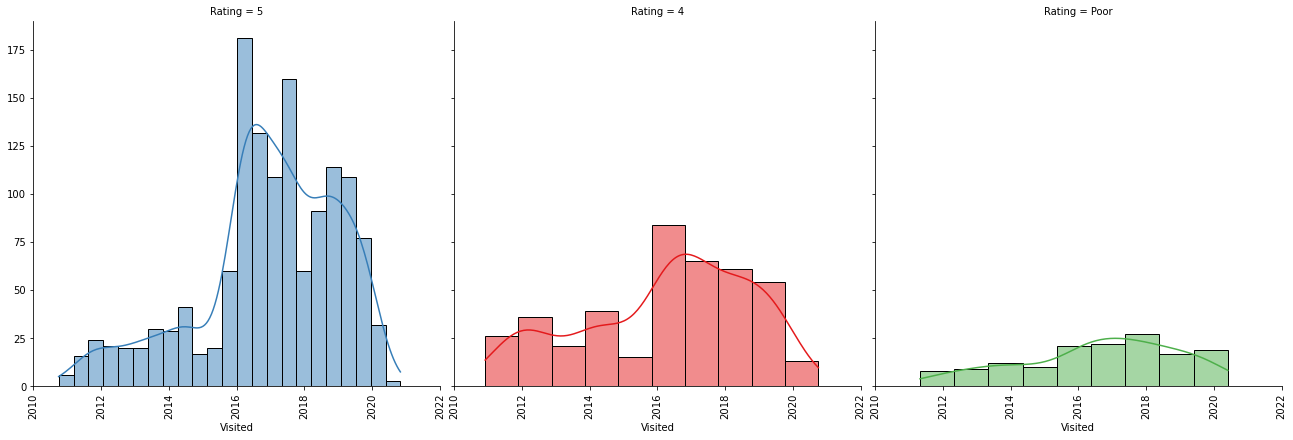

In [103]:
visited_grid_4 = sns.FacetGrid(data=ta_5vspoor_4_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_4.map(sns.histplot, "Visited", kde=True)

visited_grid_4.set_xticklabels(rotation='vertical', fontsize=10)

In [104]:
ta_5vspoor_5 = ta_5vspoor[(ta_5vspoor['Attraction']=='The Wizarding World of Harry Potter')]
ta_5vspoor_5

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
5969,The Wizarding World of Harry Potter,Los Angeles,2020-08-01,2019-10-01,313,148,1,5,"They did a great job of replicating the ""Wizar...",A Must Experience for any Harry Potter Fan!,MichaelLong1963,COLORADO SPRINGS,CO,,,
5970,The Wizarding World of Harry Potter,Los Angeles,2020-05-01,2020-01-01,119,16,0,5,This section of Universal Studios was the most...,"Amazing, but crowded",rmrincon,AUSTIN,TX,,,
5971,The Wizarding World of Harry Potter,Los Angeles,2020-10-01,2019-12-01,493,251,2,4,We haven't been to Universal for a long time s...,"Awesome area, overrated ride",wdl,SUNNYVALE,CA,,,
5972,The Wizarding World of Harry Potter,Los Angeles,2020-06-01,2019-09-01,32,47,1,5,"Fantastic place, when you visit make sure you ...",Harry Potter world,lilianasmith,BRAZIL,,,,
5973,The Wizarding World of Harry Potter,Los Angeles,2020-10-01,2020-10-01,11,14,1,5,Harry Potter wizarding world was an easy five ...,Incredible,Alan,LOS ANGELES,CA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,The Wizarding World of Harry Potter,Los Angeles,2019-03-01,2019-03-01,89,18,0,4,I really had my hopes up for this one as every...,Over hyped but still cool,Dan B,SURREY,CANADA,,,
34841,The Wizarding World of Harry Potter,Los Angeles,2019-03-01,2019-03-01,8,2,0,5,Very fun experience; Hydration is very importa...,Awesome attraction,Lori P,,,,,
34843,The Wizarding World of Harry Potter,Los Angeles,2019-03-01,2019-03-01,318,96,0,5,great rides and the set up is incredible you r...,soo cool,OntarioAna,ONTARIO,,,,
34845,The Wizarding World of Harry Potter,Los Angeles,2019-03-01,2019-02-01,4,5,0,5,This portion of the Universal theme park is sm...,"If you're a Harry Potter fan (and who isn't?),...",Robin G,STUDIO CITY,,,,


In [105]:
ta_5vspoor_5_df = ta_5vspoor_5.loc[:, ['Visited', 'Rating']]
ta_5vspoor_5_df.sample(15)

,Visited,Rating
16642,2019-08-01,5
16478,2017-11-01,5
16411,2018-07-01,5
16359,2018-05-01,5
15885,2017-01-01,5
15909,2017-01-01,5
16249,2018-01-01,4
15794,2016-10-01,5
15713,2016-06-01,4
16614,2019-06-01,5


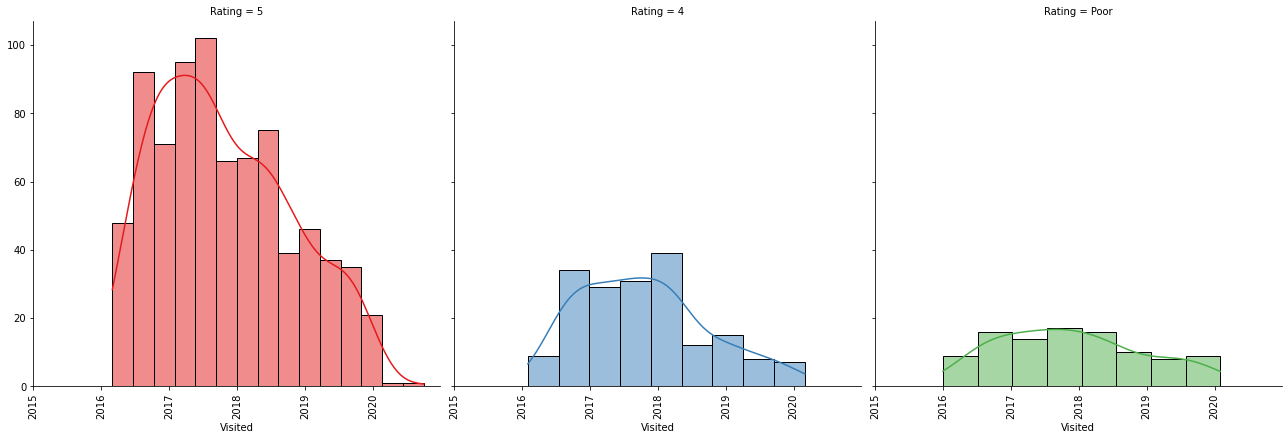

In [106]:
visited_grid_5 = sns.FacetGrid(data=ta_5vspoor_5_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_5.map(sns.histplot, "Visited", kde=True)

visited_grid_5.set_xticklabels(rotation='vertical', fontsize=10)

## Analyzing 5 star reviews on specific month and year

In [107]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('los', 'angeles'), 31),
 (('harry', 'potter'), 31),
 (('studio', 'tour'), 19),
 (('hollywood', 'sign'), 17),
 (('universal', 'studio'), 17),
 (('getty', 'center'), 14),
 (('well', 'worth'), 13),
 (('great', 'place'), 12),
 (('griffith', 'observatory'), 11),
 (('view', 'los'), 11)]

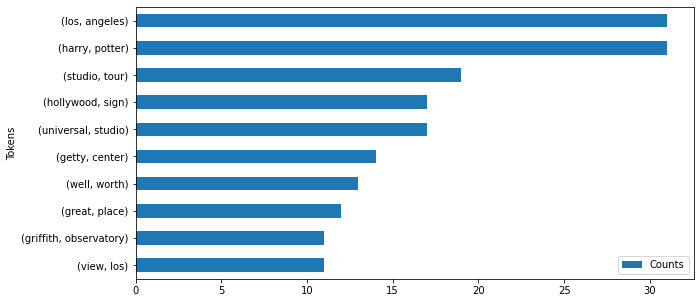

In [108]:
# Graph of 5 Star Bigram

fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

In [109]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

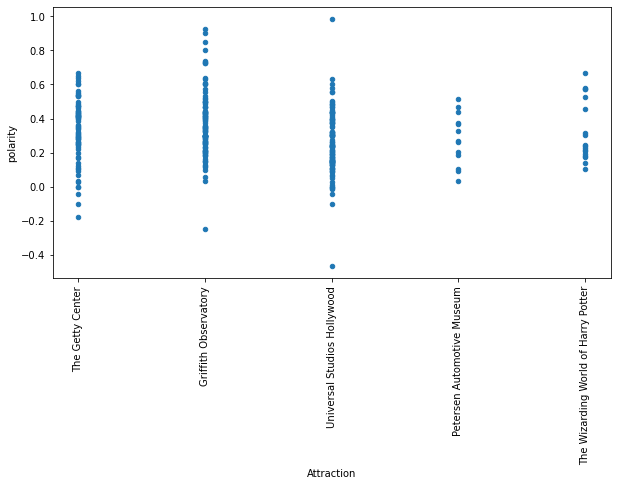

In [110]:
sample = ta_5vspoor_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [111]:
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

In [112]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('harry', 'potter'), 62),
 (('los', 'angeles'), 33),
 (('studio', 'tour'), 32),
 (('universal', 'studio'), 31),
 (('hollywood', 'sign'), 24),
 (('vault', 'tour'), 20),
 (('great', 'place'), 16),
 (('well', 'worth'), 15),
 (('place', 'visit'), 15),
 (('griffith', 'observatory'), 14),
 (('getty', 'center'), 14),
 (('great', 'view'), 13),
 (('view', 'la'), 12),
 (('view', 'city'), 12),
 (('one', 'day'), 12),
 (('potter', 'world'), 12),
 (('theme', 'park'), 12),
 (('view', 'los'), 11),
 (('clear', 'day'), 10),
 (('view', 'amazing'), 10)]

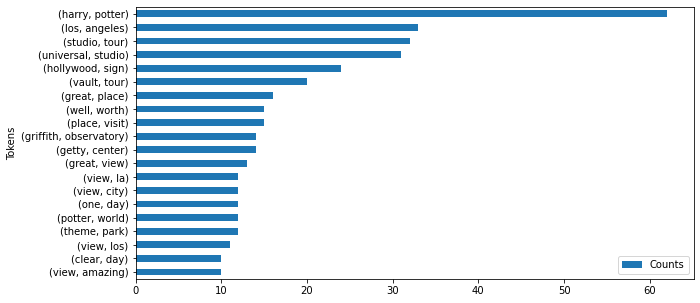

In [113]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

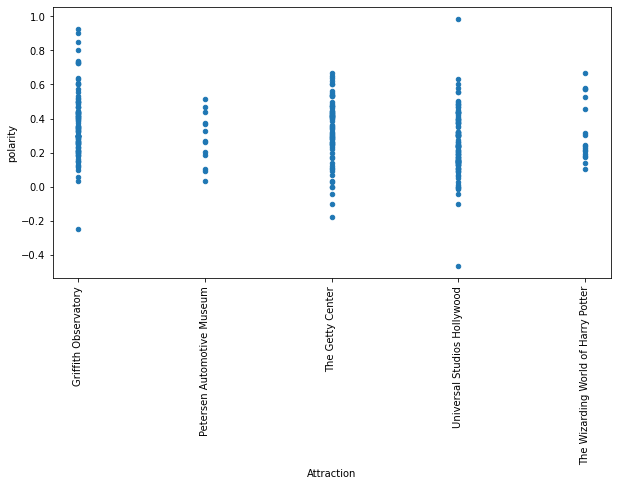

In [114]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

In [126]:
user_loc_df = tripadv[(tripadv['City']=='Los Angeles') &
                     (tripadv['User_Loc2']!='')]
user_loc_agg_df = user_loc_df.groupby('User_Loc2')['Rating'].agg(['count', 'mean', 'std'])
user_loc_agg_df

,count,mean,std
User_Loc2,,,
AB,1,5.000000,NaN
AK,6,4.000000,1.095445
AL,14,4.714286,0.611250
ALBANIA,1,5.000000,NaN
ALBERTA,5,3.600000,1.673320
...,...,...,...
WI,29,4.310345,0.929802
WV,13,4.384615,0.650444
WY,3,4.333333,1.154701


In [127]:
user_loc_agg_df_10 = user_loc_agg_df[user_loc_agg_df['count']>=10].sort_values('mean', ascending = False)
user_loc_agg_df_10.head(5)

,count,mean,std
User_Loc2,,,
VA,56,4.857143,0.401297
POLAND,13,4.846154,0.375534
RUSSIA,12,4.833333,0.389249
SP,11,4.818182,0.404520
ARGENTINA,16,4.812500,0.543906


In [128]:
user_loc_agg_df_10.tail(5)

,count,mean,std
User_Loc2,,,
ISRAEL,42,4.261905,0.989198
TN,35,4.257143,1.120474
FINLAND,18,4.222222,0.942809
NM,24,4.208333,1.062367
SOUTH AFRICA,19,4.157895,1.014515


In [129]:
ta_loc_1 = user_loc_df[(user_loc_df['User_Loc2']=='VA') |
                       (user_loc_df['User_Loc2']=='POLAND') |
                       (user_loc_df['User_Loc2']=='RUSSIA') |
                       (user_loc_df['User_Loc2']=='SP') |
                       (user_loc_df['User_Loc2']=='ARGENTINA')]
ta_loc_1.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
17033,The Getty Center,Los Angeles,2018-05-01,2018-05-01,38,8,0,5,This is the most beautiful museum both inside ...,This time having lots of money WORKED for the ...,Sandi20170,HERNDON,VA,,,
10723,Griffith Observatory,Los Angeles,2019-04-01,2019-03-01,8,0,0,5,Amazing museum with astonishing attractions an...,Science at its best,Lua Viajante,SAO PAULO,SP,,,
16936,The Getty Center,Los Angeles,2018-04-01,2018-04-01,164,47,0,5,"When planning a trip to the Getty Center, don'...",Put an Entire Day Aside for the Getty Center,Paul_Har,ARLINGTON,VA,,,
10452,Griffith Observatory,Los Angeles,2019-01-01,2019-01-01,462,71,0,5,Worth a trip. If you go on the weekend take ad...,Awesome views of Los Angeles,kdbauder,LORTON,VA,,,
14967,Petersen Automotive Museum,Los Angeles,2017-10-01,2017-09-01,271,96,0,5,We had such a fun day at the Petersen Museum! ...,Fantastic Museum and great restaurant!,InfoMiss Trips,SAO PAULO,SP,,,
18336,The Getty Center,Los Angeles,2019-08-01,2019-08-01,1,0,0,5,Enjoyable morning spent here on a fine Sunday....,Great place!,Jessica Mohr,VIRGINIA BEACH,VA,,,
12600,Universal Studios Hollywood,Los Angeles,2019-07-01,NaT,579,298,4,4,Went on July 5th. Initially the Park wasn’t to...,"Way too busy, but some great rides",SB01,KRAKOW,POLAND,,,
16431,The Wizarding World of Harry Potter,Los Angeles,2018-08-01,2017-12-01,46,14,0,5,Although the Wizarding World of Harry Potter i...,"If you are a HP fan, take a tissue. If you are...",Giovanna S,SAO PAULO,SP,,,
10382,Griffith Observatory,Los Angeles,2019-01-01,2018-12-01,23,9,0,5,The views were great at night! It was a challe...,Beautiful view of LA at night!,Barbara L,MECHANICSVILLE,VA,,,
14114,Petersen Automotive Museum,Los Angeles,2014-12-01,2014-12-01,"1,177",216,0,5,Love the priceless collection of comestic and ...,If you love Automobiles - this is Ground Zero,J H H,MCLEAN,VA,,,


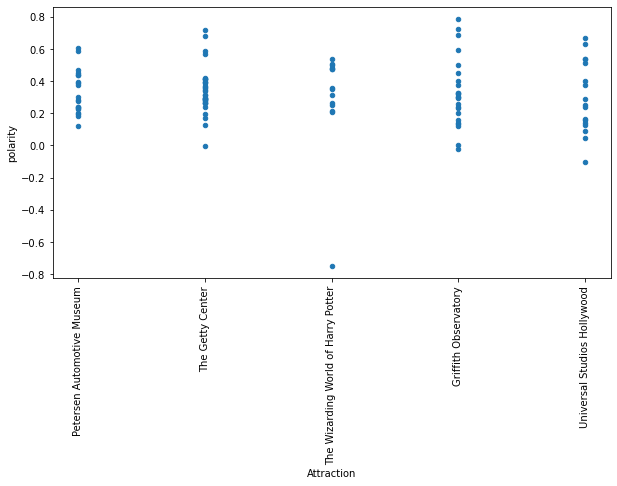

In [130]:
from textblob import TextBlob

sample_size = len(ta_loc_1.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_1.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [131]:
corpus_loc_1 = ' '.join(ta_loc_1['Text']).lower()
tokens_loc_1 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_1) if tokens not in stop_filters]

bigram_loc_1 = list(nltk.bigrams(tokens_loc_1))
fdist_bi_loc_1 = FreqDist(bigram_loc_1)
fdist_bi_loc_1.most_common(10)

[(('los', 'angeles'), 10),
 (('getty', 'center'), 10),
 (('harry', 'potter'), 7),
 (('hollywood', 'sign'), 6),
 (('place', 'visit'), 6),
 (('make', 'sure'), 6),
 (('vault', 'tour'), 6),
 (('view', 'los'), 5),
 (('great', 'place'), 5),
 (('definitely', 'worth'), 5)]

In [132]:
trigram_loc_1 = list(nltk.trigrams(tokens_loc_1))
fdist_tri_loc_1 = FreqDist(trigram_loc_1)
fdist_tri_loc_1.most_common(10)

[(('view', 'los', 'angeles'), 5),
 (('city', 'hollywood', 'sign'), 3),
 (('like', '--', 'go'), 2),
 (('see', 'hollywood', 'sign'), 2),
 (('year', 'old', 'son'), 2),
 (('definitely', 'worth', 'visit'), 2),
 (('show', 'must', 'see'), 2),
 (('view', 'city', 'hollywood'), 2),
 (('sign', 'free', 'parking'), 2),
 (('free', 'parking', '15'), 2)]

In [133]:
ta_loc_2 = user_loc_df[(user_loc_df['User_Loc2']=='ISRAEL') |
                       (user_loc_df['User_Loc2']=='TN') |
                       (user_loc_df['User_Loc2']=='FINLAND') |
                       (user_loc_df['User_Loc2']=='NM') |
                       (user_loc_df['User_Loc2']=='SOUTH AFRICA')]
ta_loc_2.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
18191,The Getty Center,Los Angeles,2019-06-01,2019-05-01,37,7,0,5,I spent a number of hours at the museum. There...,"Lovely museum, very interesting exhibits",Deborah M,HAIFA,ISRAEL,,,
11944,Universal Studios Hollywood,Los Angeles,2019-02-01,2019-02-01,344,15,1,4,I've been to Universal Studios in Orlando in t...,Great park!,Lotan P,HAIFA,ISRAEL,,,
12080,Universal Studios Hollywood,Los Angeles,2019-03-01,2019-03-01,618,120,0,4,"Over the Orlando resort, this was a bit disapp...",Movie Magic,Andrew S,JOHANNESBURG,SOUTH AFRICA,,,
16472,The Wizarding World of Harry Potter,Los Angeles,2018-10-01,2018-10-01,178,18,0,4,A must for all Harry Potter fans. A recreation...,Feel Like a Wizard...,Tamohara,CAPE TOWN,SOUTH AFRICA,,,
14887,Petersen Automotive Museum,Los Angeles,2017-08-01,2017-07-01,"3,980",826,0,5,"Great place. Easy to find, though their parkin...",Best Auto museum in California,bruce p,ALBUQUERQUE,NM,,,
12513,Universal Studios Hollywood,Los Angeles,2019-06-01,2019-06-01,173,61,0,4,Good and nice theme park. Tickets are expensiv...,Good theme park,Nina K,HAUKIPUDAS,FINLAND,,,
17942,The Getty Center,Los Angeles,2019-03-01,2019-03-01,"1,113",304,0,5,"We visited the Getty museum early, when it jus...",Great museum,Dr_Iris_B,RAMAT GAN,ISRAEL,,,
16099,The Wizarding World of Harry Potter,Los Angeles,2017-08-01,2017-08-01,"3,980",826,0,3,"Cool part of the park, nice re-creation of the...",Only two rides here,bruce p,ALBUQUERQUE,NM,,,
13400,Universal Studios Hollywood,Los Angeles,2019-12-01,2019-12-01,382,91,0,3,Arrive early to get in without waiting.. be pr...,Long queues....,Sofia M,HELSINKI,FINLAND,,,
11381,Griffith Observatory,Los Angeles,2019-11-01,2019-11-01,17,3,0,5,I came for the view and happened to go to a Pl...,Spectacular,saracgrady,TEL AVIV,ISRAEL,,,


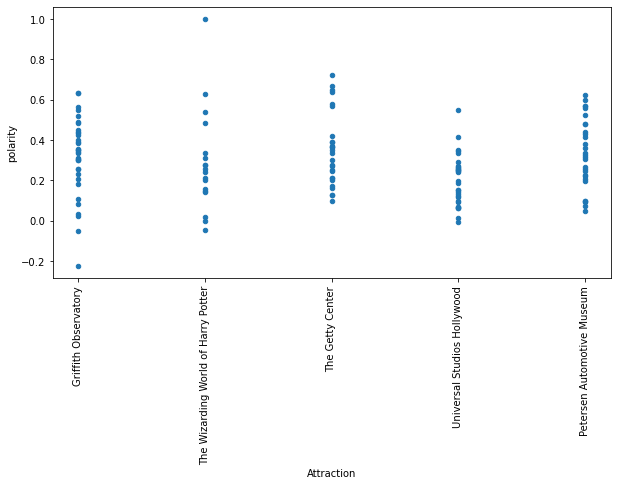

In [134]:
from textblob import TextBlob

sample_size = len(ta_loc_2.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_2.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- We might be seeing that the reason why there are so many positive reviews in the top 5 count is that a lot of them went to Fenway
- we might want to consider how we market to different groups based on these grams

In [135]:
corpus_loc_2 = ' '.join(ta_loc_2['Text']).lower()
tokens_loc_2 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_2) if tokens not in stop_filters]

bigram_loc_2 = list(nltk.bigrams(tokens_loc_2))
fdist_bi_loc_2 = FreqDist(bigram_loc_2)
fdist_bi_loc_2.most_common(10)

[(('vault', 'tour'), 25),
 (('harry', 'potter'), 22),
 (('universal', 'studio'), 15),
 (('studio', 'tour'), 13),
 (('hollywood', 'sign'), 10),
 (('tour', 'guide'), 9),
 (('getty', 'center'), 9),
 (('wait', 'time'), 8),
 (('great', 'place'), 7),
 (('could', 'see'), 7)]

In [136]:
trigram_loc_2 = list(nltk.trigrams(tokens_loc_2))
fdist_tri_loc_2 = FreqDist(trigram_loc_2)
fdist_tri_loc_2.most_common(10)

[(('go', 'vault', 'tour'), 6),
 (('harry', 'potter', 'ride'), 5),
 (('universal', 'studio', 'hollywood'), 4),
 (('see', 'hollywood', 'sign'), 3),
 (('single', 'rider', 'line'), 3),
 (('harry', 'potter', 'world'), 3),
 (('wait', 'time', 'ride'), 3),
 (('special', 'effect', 'show'), 3),
 (('view', 'hollywood', 'sign'), 2),
 (('great', 'place', 'visit'), 2)]